In [ ]:
pip install --upgrade pandas h5py

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 713.8 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: h5py
    Found existing installation: h5py 3.11.0
    Uninstalling h5py-3.11.0:
      Successfully uninstalled h5py-3.11.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import h5py
from PIL import Image
import seaborn as sns
import os
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

In [2]:
# to access data from google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import single file
path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_12_04.h5"
with h5py.File(path, 'r') as hdf:
    print("Keys in the file:", list(hdf.keys()))


Keys in the file: ['data', 'events', 'general']


In [ ]:
# Import multiple files from same directory
dir_path = "/content/drive/MyDrive/Data/ePhys"
# Create a list of needed files
# These are for Guangxitoxin Experiments
file_list = ["iPhys_2024_10_09.h5", "iPhys_2024_10_22_1.h5"]

# Iterate through each file
for file_name in file_list:
    # Construct the full path to the file
    file_path = os.path.join(dir_path, file_name)

    # Open the file and print the keys
    with h5py.File(file_path, 'r') as hdf:
        print(f"Keys in the file {file_name}:", list(hdf.keys()))


Keys in the file iPhys_2024_10_09.h5: ['data', 'events', 'general']
Keys in the file iPhys_2024_10_22_1.h5: ['data', 'events', 'general']


In [ ]:
# Inspect the Subkeys
with h5py.File(path, 'r') as hdf:
    for key in hdf.keys():
        print(f"Key: {key}")
        print(f"Type: {type(hdf[key])}")
        if isinstance(hdf[key], h5py.Group):
            print("Subkeys:", list(hdf[key].keys()))
        elif isinstance(hdf[key], h5py.Dataset):
            print("Shape:", hdf[key].shape)
            print("Data type:", hdf[key].dtype)

Key: data
Type: <class 'h5py._hl.group.Group'>
Subkeys: ['trace_0', 'trace_1', 'trace_2']
Key: events
Type: <class 'h5py._hl.group.Group'>
Subkeys: ['event_0']
Key: general
Type: <class 'h5py._hl.group.Group'>
Subkeys: ['AAV_Left1', 'AAV_Left2', 'AAV_Right1', 'AAV_Right2', 'Age', 'DOB', 'Date', 'Dir', 'Experimentalist', 'Manipulation_Left', 'Manipulation_Right', 'Notes', 'Reporter1', 'Reporter2', 'Sex', 'Strain', 'T_2pTime', 'T_general', 'Type']


In [ ]:
# Read experiment notes
with h5py.File(path, 'r') as hdf:
    # Access the 'Notes' dataset
    notes_data = hdf['general/Notes'][()]
    # Convert from byte format to a string
    notes_text = notes_data.decode('utf-8') if isinstance(notes_data, bytes) else notes_data
    print(notes_text)

[b'mouse id: K7382' b'' b'']


In [ ]:
with h5py.File(path, 'r') as hdf:
    event_0 = hdf['events/event_0']
    for subkey in event_0.keys():
        item = event_0[subkey]
        print(f"Subkey: {subkey}")
        print(f"Type: {type(item)}")
        if isinstance(item, h5py.Group):
            print(f"Nested subkeys in '{subkey}':", list(item.keys()))
        elif isinstance(item, h5py.Dataset):
            print(f"Shape of '{subkey}':", item.shape)
            print(f"Data type of '{subkey}':", item.dtype)

Subkey: T_2pZstack
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'T_2pZstack': (1,)
Data type of 'T_2pZstack': object
Subkey: T_Event
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'T_Event': (10, 2)
Data type of 'T_Event': object
Subkey: T_comment
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'T_comment': (1,)
Data type of 'T_comment': object
Subkey: eventTime
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'eventTime': (1,)
Data type of 'eventTime': object


In [ ]:
# Inspect subkeys
with h5py.File(path, 'r') as hdf:
    trace_0 = hdf['data/trace_0']
    print(f"Type of 'trace_0': {type(trace_0)}")
    if isinstance(trace_0, h5py.Group):
        print("Subkeys in 'trace_0':", list(trace_0.keys()))
    elif isinstance(trace_0, h5py.Dataset):
        print("Shape of 'trace_0':", trace_0.shape)
        print("Data type of 'trace_0':", trace_0.dtype)


Type of 'trace_0': <class 'h5py._hl.group.Group'>
Subkeys in 'trace_0': ['sweep_0']


In [ ]:
with h5py.File(path, 'r') as hdf:
    sweep_0 = hdf['data/trace_0/sweep_0']
    print(f"Type of 'sweep_0': {type(sweep_0)}")
    if isinstance(sweep_0, h5py.Group):
        print("Subkeys in 'sweep_0':", list(sweep_0.keys()))
    elif isinstance(sweep_0, h5py.Dataset):
        print("Shape of 'sweep_0':", sweep_0.shape)
        print("Data type of 'sweep_0':", sweep_0.dtype)



Type of 'sweep_0': <class 'h5py._hl.group.Group'>
Subkeys in 'sweep_0': ['M_EPChannelsParams', 'W_EPparams', 'ephys', 'ephys_stim', 'two_photon', 'visual_stim']


In [ ]:
# Inspect sweep 0
with h5py.File(path, 'r') as hdf:
    sweep_0 = hdf['data/trace_0/sweep_0']
    for subkey in sweep_0.keys():
        item = sweep_0[subkey]
        print(f"Subkey: {subkey}")
        print(f"Type: {type(item)}")
        if isinstance(item, h5py.Group):
            print(f"Nested subkeys in '{subkey}':", list(item.keys()))
        elif isinstance(item, h5py.Dataset):
            print(f"Shape of '{subkey}':", item.shape)
            print(f"Data type of '{subkey}':", item.dtype)

Subkey: M_EPChannelsParams
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'M_EPChannelsParams': (8, 13)
Data type of 'M_EPChannelsParams': float32
Subkey: W_EPparams
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'W_EPparams': (40,)
Data type of 'W_EPparams': float64
Subkey: ephys
Type: <class 'h5py._hl.group.Group'>
Nested subkeys in 'ephys': ['ChRead_2']
Subkey: ephys_stim
Type: <class 'h5py._hl.group.Group'>
Nested subkeys in 'ephys_stim': ['ChWrite_0', 'ChWrite_2', 'T_Protocol', 'W_OutDigital']
Subkey: two_photon
Type: <class 'h5py._hl.group.Group'>
Nested subkeys in 'two_photon': ['Info', 'W_RecordedChannels', 'file_004_ChanB', 'file_name', 'image_num']
Subkey: visual_stim
Type: <class 'h5py._hl.group.Group'>
Nested subkeys in 'visual_stim': ['M_Movie', 'M_SpeedModulation', 'M_TimeModulation', 'T_VSprotocol', 'W_Params', 'W_VSparams']


In [ ]:
# Inspect file
with h5py.File(path, 'r') as hdf:
    ephys = hdf['data/trace_0/sweep_0/ephys']
    for subkey in ephys.keys():
        item = ephys[subkey]
        print(f"Subkey: {subkey}")
        print(f"Type: {type(item)}")
        if isinstance(item, h5py.Group):
            print(f"Nested subkeys in '{subkey}':", list(item.keys()))
        elif isinstance(item, h5py.Dataset):
            print(f"Shape of '{subkey}':", item.shape)
            print(f"Data type of '{subkey}':", item.dtype)

Subkey: ChRead_2
Type: <class 'h5py._hl.dataset.Dataset'>
Shape of 'ChRead_2': (15001,)
Data type of 'ChRead_2': float32


In [ ]:
# Inspect file
with h5py.File(path, 'r') as hdf:
    chread_0_data = hdf['data/trace_0/sweep_0/ephys/ChRead_0'][:]
    chread_2_data = hdf['data/trace_0/sweep_0/ephys/ChRead_2'][:]

    print("ChRead_0 shape:", chread_0_data.shape)
    print("First 10 points of ChRead_0 data:", chread_0_data[:10])
    print("ChRead_2 shape:", chread_2_data.shape)
    print("First 10 points of ChRead_2 data:", chread_2_data[:10])

ChRead_2 shape: (15001,)
First 10 points of ChRead_2 data: [0.00918945 0.03236752 0.03152158 0.00483133 0.00303729 0.01021628
 0.01574224 0.00486578 0.00185056 0.00691621]


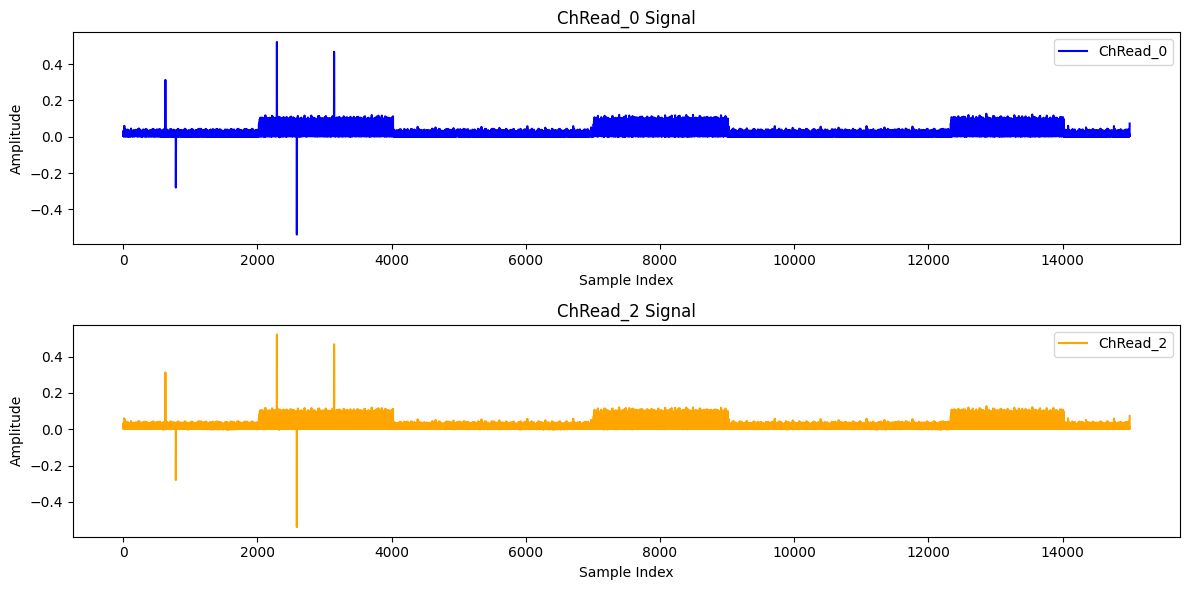

In [ ]:
# Plot data/trace_0/sweep_0/ephys/ChRead_0 and data/trace_0/sweep_0/ephys/ChRead_2 to check which is the data
# Create the plots
plt.figure(figsize=(12, 6))

# Plot ChRead_0
plt.subplot(2, 1, 1)
plt.plot(chread_0_data, label='ChRead_0', color='blue')
plt.title('ChRead_0 Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

# Plot ChRead_2
plt.subplot(2, 1, 2)
plt.plot(chread_2_data, label='ChRead_2', color='orange')
plt.title('ChRead_2 Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Open the HDF5 file and iterate through all traces and sweeps
with h5py.File(path, 'r') as hdf:
    # Iterate over all traces
    for trace_key in hdf['data'].keys():
        trace_group = hdf['data'][trace_key]

        # Iterate over all sweeps in the trace
        for sweep_key in trace_group.keys():
            sweep_group = trace_group[sweep_key]
            ephys_group = sweep_group['ephys']

            # Access and plot ChRead_0 and ChRead_2 for each sweep
            for chread_key in ephys_group.keys():
                if 'ChRead' in chread_key:  # This ensures we're accessing ChRead data
                    chread_data = ephys_group[chread_key][:]
                    plt.figure(figsize=(10, 5))
                    plt.plot(chread_data, label=chread_key)
                    plt.title(f'{trace_key} - {sweep_key} - {chread_key} Signal')
                    plt.xlabel('Sample Index')
                    plt.ylabel('Amplitude')
                    plt.legend()
                    plt.show()

**Starburst Amacrine Cells Background**

- Starburst Amacrine cells are retinal interneurons responsible for direction selectivity
- Highly arborized cells that tile the retina
- Inhibit downstream ganglion cells depending on the movement direction
- Potassium channels help the starburst amacrine cells selectively inhibit signals when a stimulus moves in the null direction

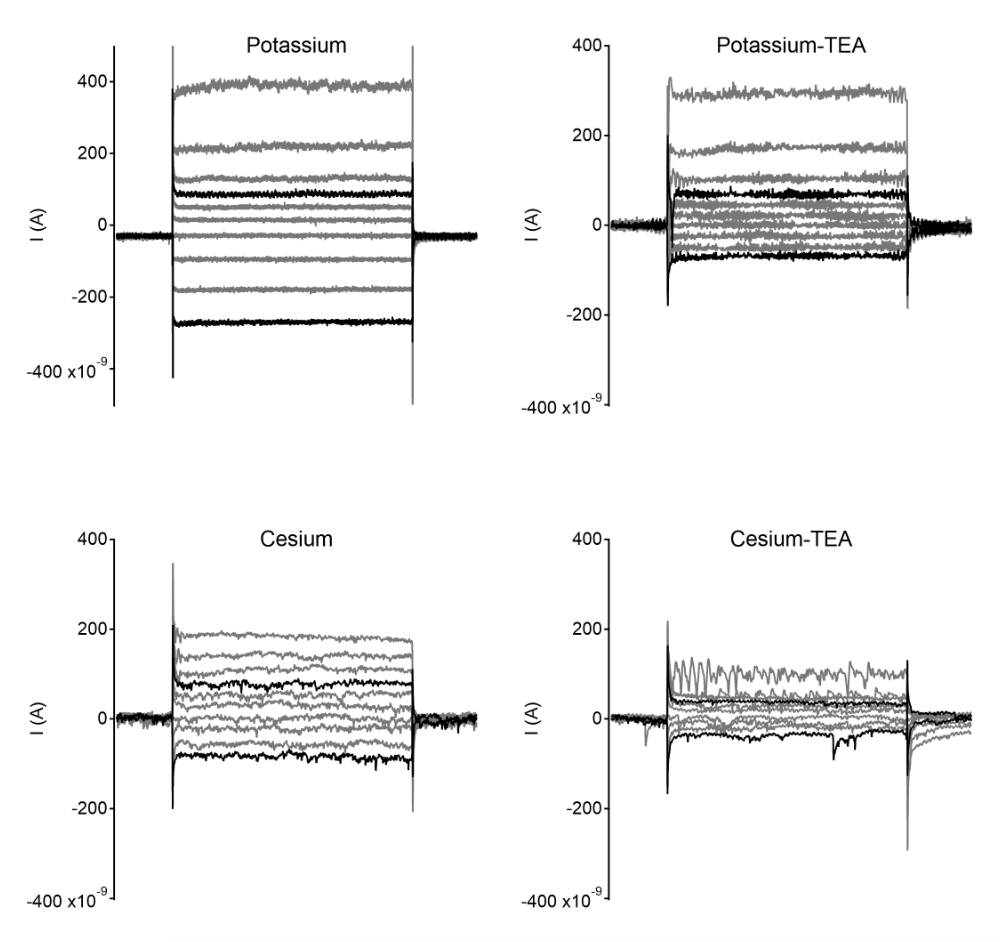

**Starburst Amacrine Cells Guangxitoxin Experiments**

- KMeSO3 internal
- Cells held @ -80mV
- Guangxitoxin is a Kv2.1 & Kv2.2 blocker
- Paired, same cell without drug and 20 min with drug


ChRead_0 data saved as NumPy array with shape: (40001, 10)


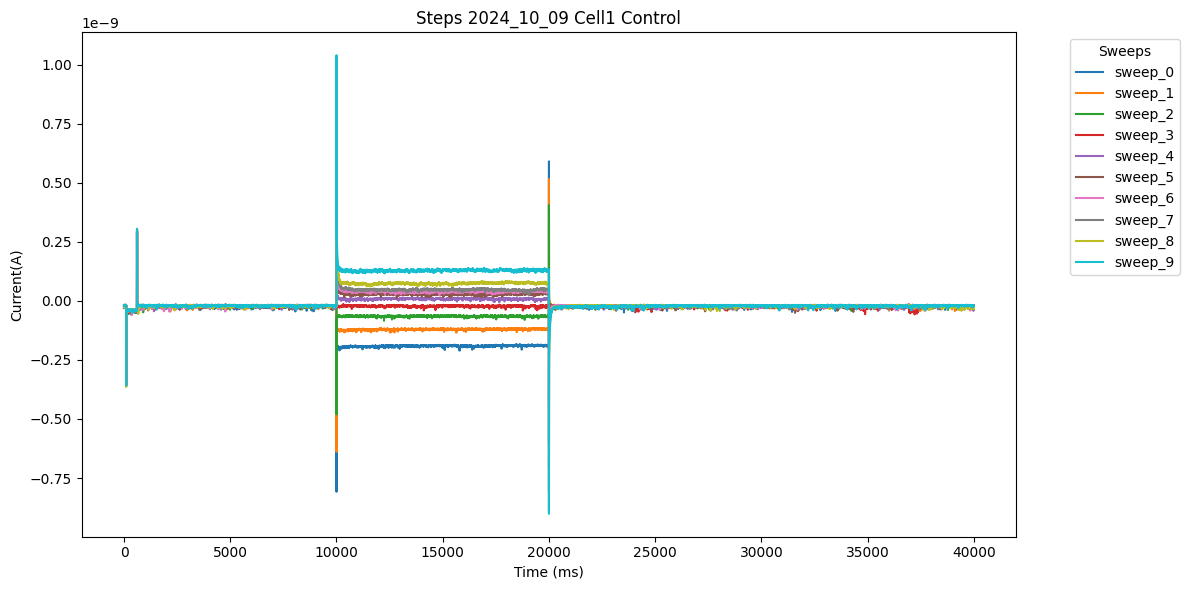

In [ ]:
# Steps 2024_10_09 Cell1 Control
file_path_2024_10_09 = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_09.h5"

# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_0
with h5py.File(file_path_2024_10_09, 'r') as hdf:
    trace_0_group = hdf['data/trace_0']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_0
    for sweep_key in trace_0_group.keys():
        sweep_group = trace_0_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # Extract and plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    control_steps_cell1_2024_10_09 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {control_steps_cell1_2024_10_09.shape}")

    # Title and labels
    plt.title('Steps 2024_10_09 Cell1 Control')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

ChRead_0 data saved as NumPy array with shape: (40001, 10)


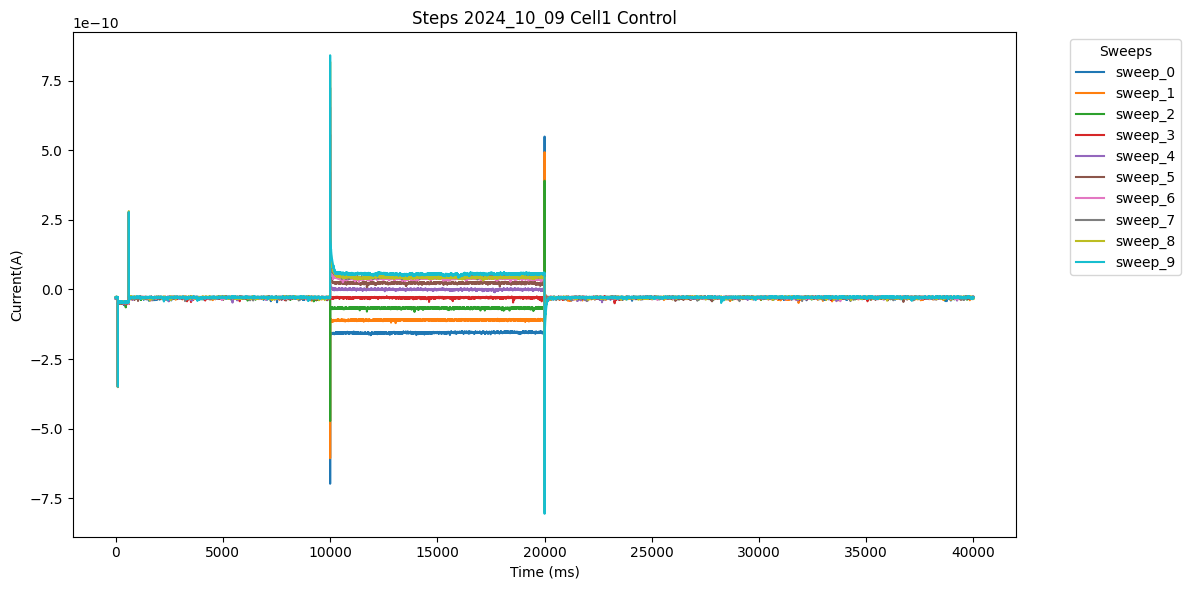

In [ ]:
# Steps 2024_10_09 Cell1 100nM Guangxitoxin
# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_8
with h5py.File(file_path_2024_10_09, 'r') as hdf:
    trace_8_group = hdf['data/trace_8']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_8 Guangxitoxin
    for sweep_key in trace_8_group.keys():
        sweep_group = trace_8_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # Extract and plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    guangxitoxin_steps_cell1_2024_10_09 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {guangxitoxin_steps_cell1_2024_10_09.shape}")

    # Title and labels
    plt.title('Steps 2024_10_09 Cell1 Control')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

ChRead_0 data saved as NumPy array with shape: (40001, 10)


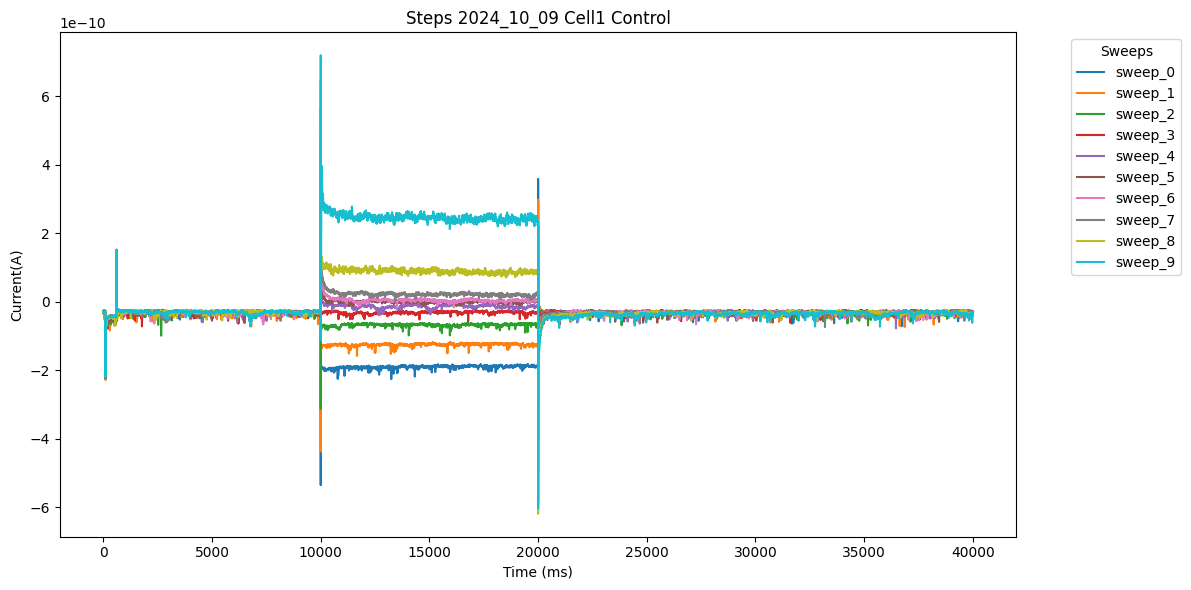

In [ ]:
# Steps 2024_10_09 Cell2 Control
# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_13
with h5py.File(file_path_2024_10_09, 'r') as hdf:
    trace_13_group = hdf['data/trace_13']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_13
    for sweep_key in trace_13_group.keys():
        sweep_group = trace_13_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    control_steps_cell2_2024_10_09 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {control_steps_cell2_2024_10_09.shape}")

    # Title and labels
    plt.title('Steps 2024_10_09 Cell1 Control')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

ChRead_0 data saved as NumPy array with shape: (40001, 10)


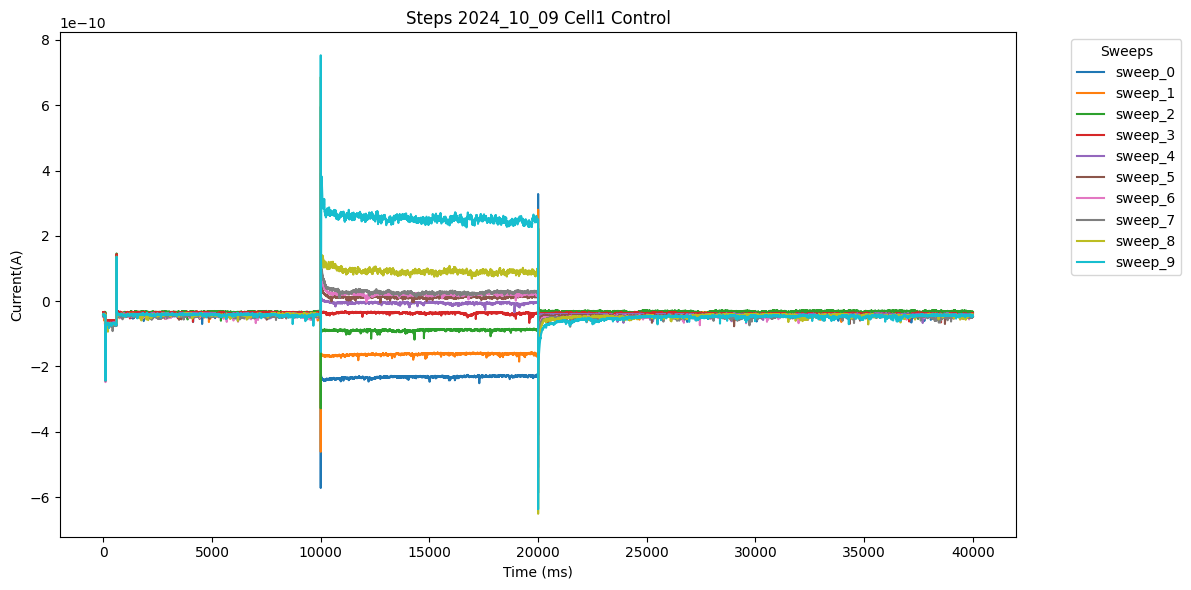

In [ ]:
# Steps 2024_10_09 Cell2 100nM Guangxitoxin
# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_22
with h5py.File(file_path_2024_10_09, 'r') as hdf:
    trace_22_group = hdf['data/trace_22']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_22 Guangxitoxin
    for sweep_key in trace_22_group.keys():
        sweep_group = trace_22_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    guangxitoxin_steps_cell2_2024_10_09 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {guangxitoxin_steps_cell2_2024_10_09.shape}")

    # Title and labels
    plt.title('Steps 2024_10_09 Cell1 Control')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

ChRead_0 data saved as NumPy array with shape: (40001, 10)


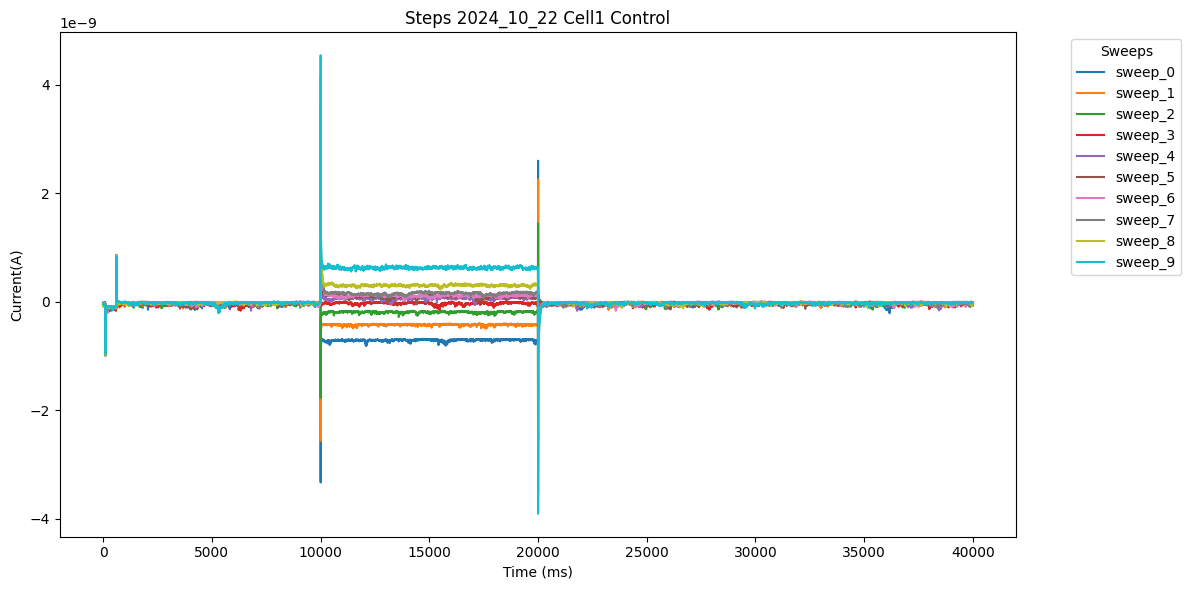

In [ ]:
# Steps 2024_10_22 Cell1 Control
# Define file path
file_path_2024_10_22 = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_22_1.h5"

# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_1
with h5py.File(file_path_2024_10_22, 'r') as hdf:
    trace_1_group = hdf['data/trace_1']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_1
    for sweep_key in trace_1_group.keys():
        sweep_group = trace_1_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    control_steps_cell1_2024_10_22 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {control_steps_cell1_2024_10_22.shape}")

    # Title and labels
    plt.title('Steps 2024_10_22 Cell1 Control')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

ChRead_0 data saved as NumPy array with shape: (40001, 10)


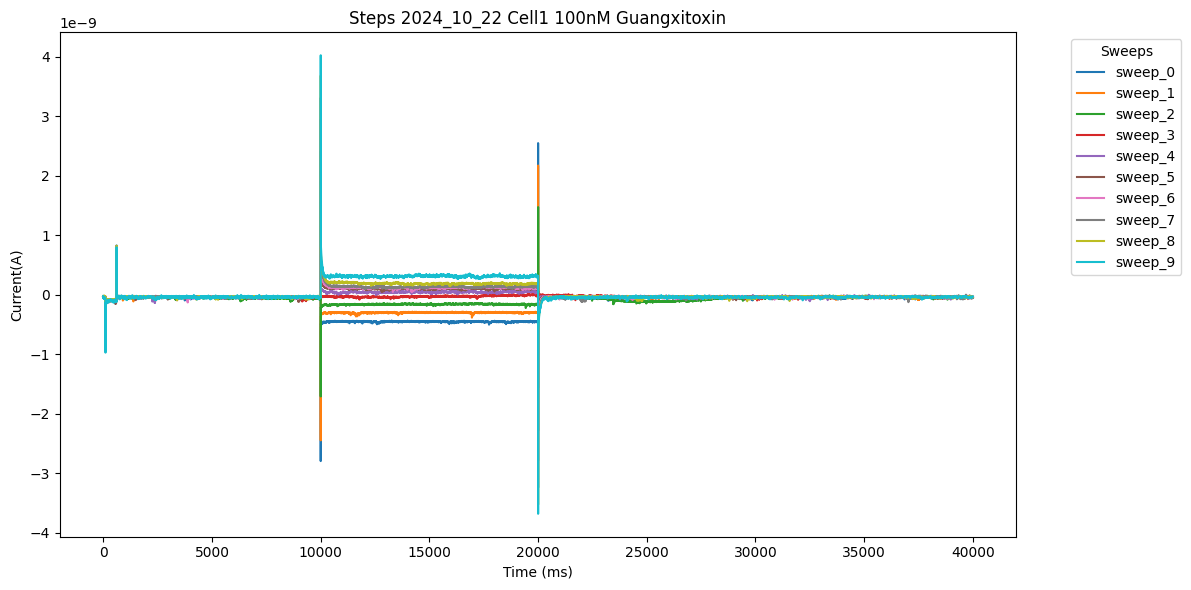

In [ ]:
# Steps 2024_10_22 Cell1 100nM Guangxitoxin

# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_9
with h5py.File(file_path_2024_10_22, 'r') as hdf:
    trace_9_group = hdf['data/trace_9']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_9
    for sweep_key in trace_9_group.keys():
        sweep_group = trace_9_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    guangxitoxin_steps_cell1_2024_10_22 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {guangxitoxin_steps_cell1_2024_10_22.shape}")

    # Title and labels
    plt.title('Steps 2024_10_22 Cell1 100nM Guangxitoxin')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

**Average Traces and Baseline Normalize**



In [ ]:
# Combine arrays
control_guangxitoxin_steps = (control_steps_cell1_2024_10_22 + control_steps_cell1_2024_10_09 + control_steps_cell2_2024_10_09)/3
guangxitoxin_steps = (guangxitoxin_steps_cell1_2024_10_22 + guangxitoxin_steps_cell1_2024_10_09 + guangxitoxin_steps_cell2_2024_10_09)/3

# Mean normalization
# Extract baseline from 5000 ms to 5100 ms from each trace
control_baseline_steps = control_guangxitoxin_steps[5000:5100,:].mean(axis=0, keepdims=True)
guangxitoxin_baseline_steps = guangxitoxin_steps[5000:5100,:].mean(axis=0, keepdims=True)

norm_control_guangxitoxin_steps = control_guangxitoxin_steps - control_baseline_steps
norm_guangxitoxin_steps = guangxitoxin_steps - guangxitoxin_baseline_steps

# Convert the NumPy arrays into DataFrames
#control_guangxitoxin_steps_df = pd.DataFrame(norm_control_guangxitoxin_steps)
#guangxitoxin_steps_df = pd.DataFrame(norm_guangxitoxin_steps)

print(f"control_guangxitoxin_steps_df saved as NumPy array with shape: {norm_control_guangxitoxin_steps.shape}")
print(f"guangxitoxin_steps_df saved as NumPy array with shape: {norm_guangxitoxin_steps.shape}")

control_guangxitoxin_steps_df saved as NumPy array with shape: (40001, 10)
guangxitoxin_steps_df saved as NumPy array with shape: (40001, 10)


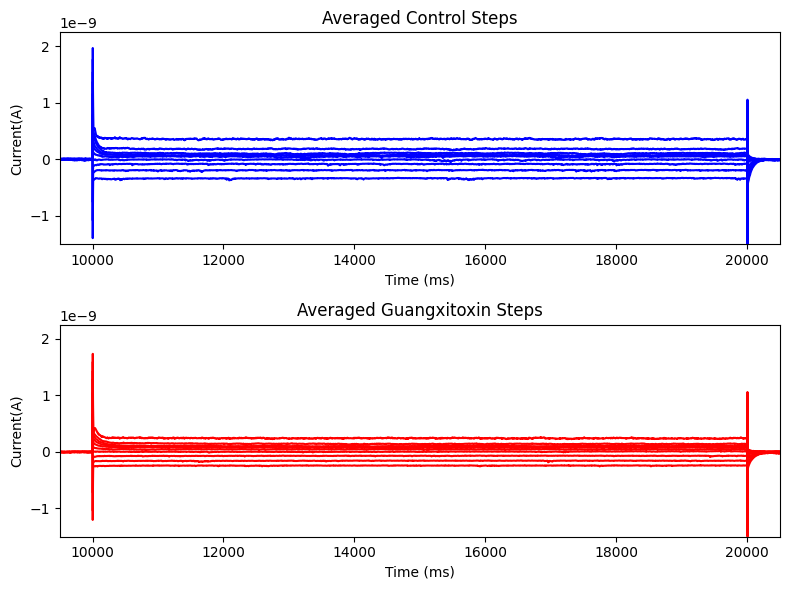

In [ ]:
# Plotting the averaged control and guangxitoxin steps
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Plot control and experimental data
ax[0].plot(norm_control_guangxitoxin_steps, label='Control', color='blue')
ax[1].plot(norm_guangxitoxin_steps, label='Guangxitoxin', color='red')


# Titles and labels
ax[0].set_title('Averaged Control Steps')
ax[1].set_title('Averaged Guangxitoxin Steps')

ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')

ax[0].set_ylabel('Current(A)')
ax[1].set_ylabel('Current(A)')

ax[0].set_xlim(9500, 20500)
ax[1].set_xlim(9500, 20500)

ax[0].set_ylim(-1.5e-9, 2.25e-9,)
ax[1].set_ylim(-1.5e-9, 2.25e-9,)

# Adjust layout to make room for the legend
plt.subplots_adjust(hspace=0.4, top=0.9, bottom=0.1)

# Show the plot
plt.tight_layout()
plt.show()

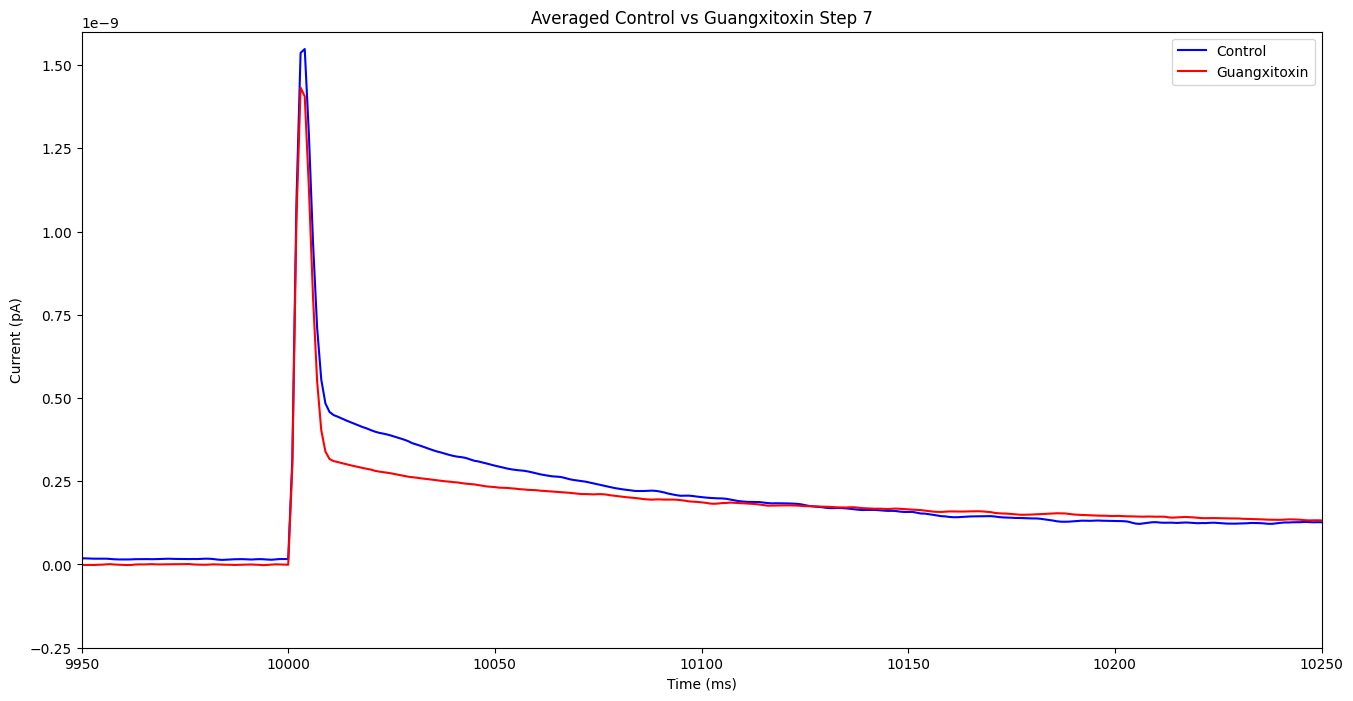

In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.plot(norm_control_guangxitoxin_steps[:,7], label='Control', color='blue')
plt.plot(norm_guangxitoxin_steps[:,7], label='Guangxitoxin', color='red')


# adjust axis dimensions
plt.xlim(9950, 10250)
plt.ylim(-0.25e-9,1.6e-9)

plt.legend(loc='upper right')

plt.title('Averaged Control vs Guangxitoxin Step 7')
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')

plt.show()

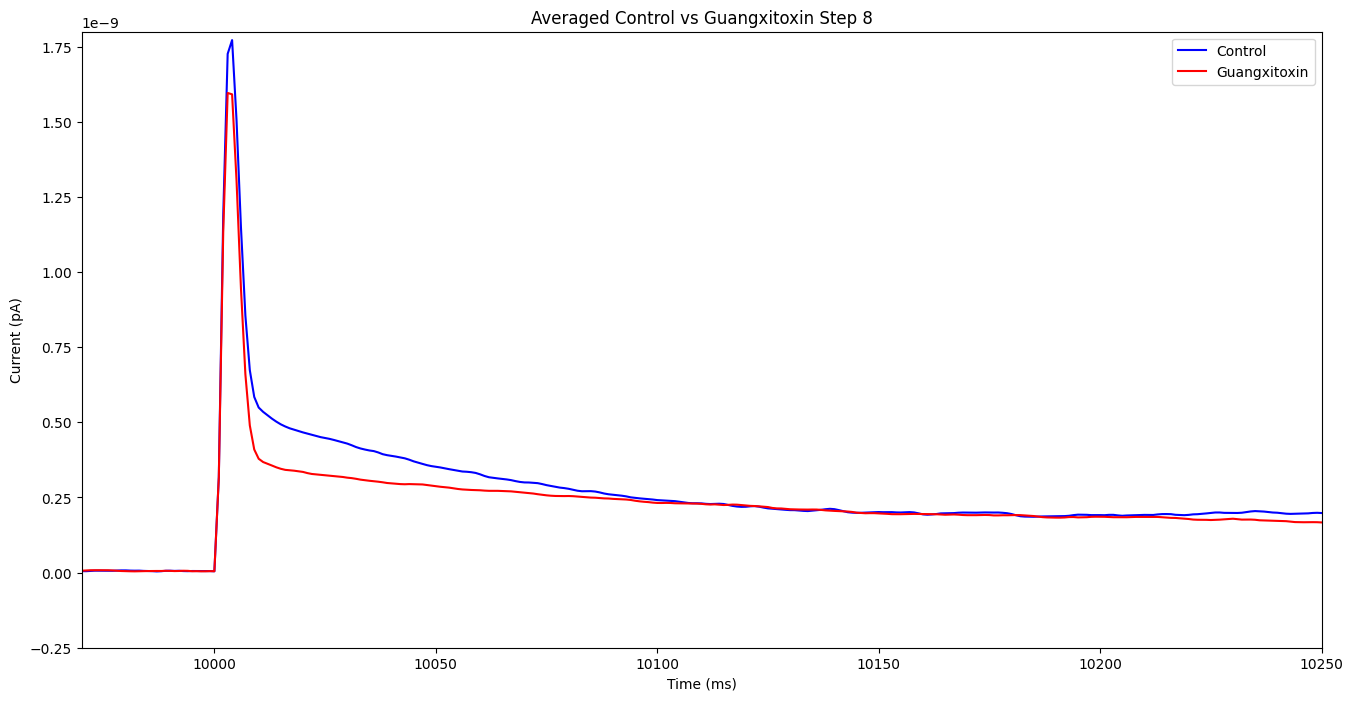

In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.plot(norm_control_guangxitoxin_steps[:,8], label='Control', color='blue')
plt.plot(norm_guangxitoxin_steps[:,8], label='Guangxitoxin', color='red')

# adjust axis dimensions
plt.xlim(9970, 10250)
plt.ylim(-0.25e-9,1.8e-9)

plt.legend(loc='upper right')

plt.title('Averaged Control vs Guangxitoxin Step 8')
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')

plt.show()

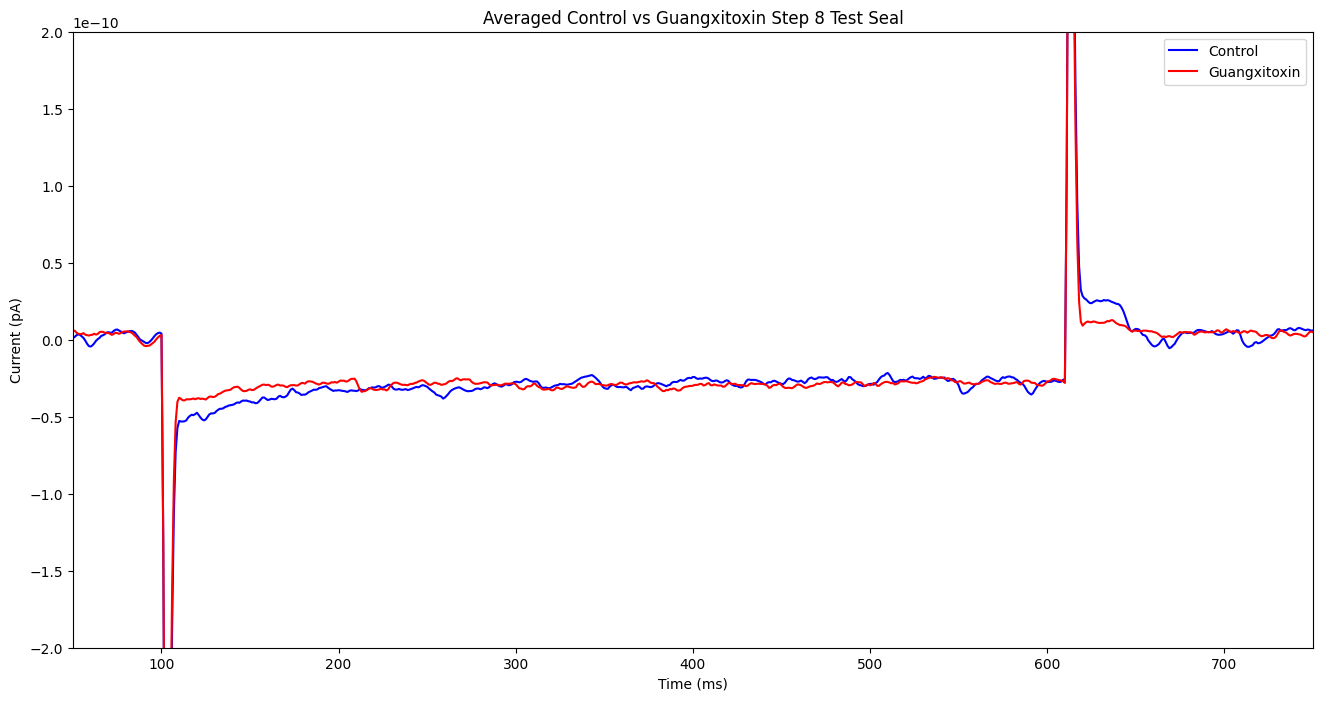

In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.plot(norm_control_guangxitoxin_steps[:,8], label='Control', color='blue')
plt.plot(norm_guangxitoxin_steps[:,8], label='Guangxitoxin', color='red')

# adjust axis dimensions
plt.xlim(50, 750)
plt.ylim(-2e-10,2e-10)

plt.legend(loc='upper right')

plt.title('Averaged Control vs Guangxitoxin Step 8 Test Seal')
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')

plt.show()

**Amacrine Cell Direction Selectivity GRNA**

- using grna to knockdown potassium channels
- Experiments done blind, without knowing if cels being recorded from were expressing grna



ChRead_0 data saved as NumPy array with shape: (40001, 10)


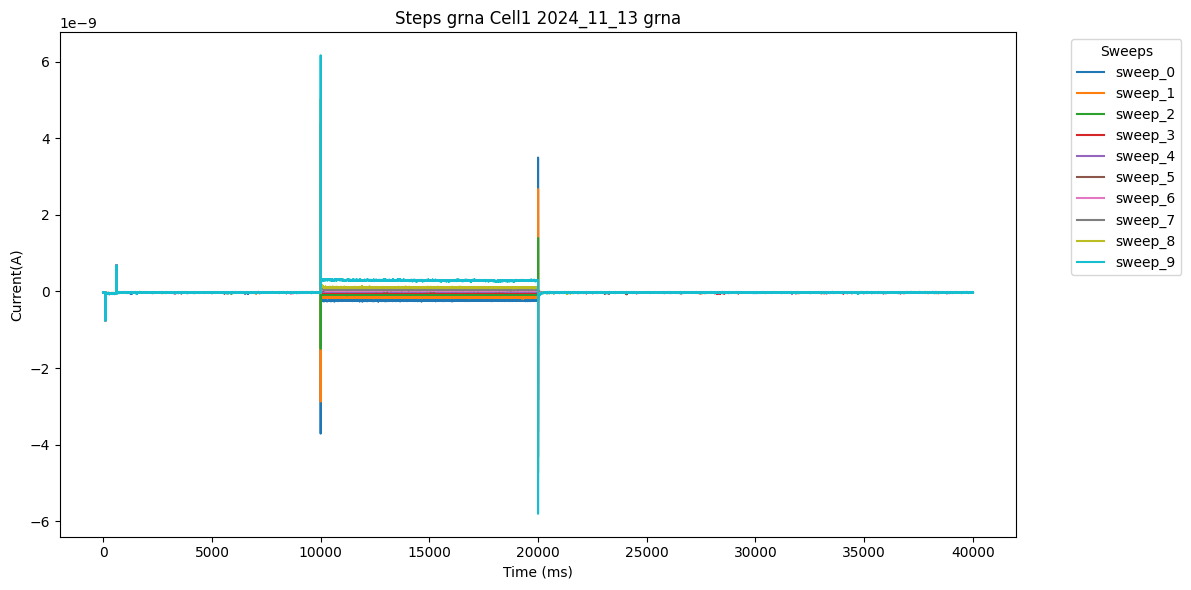

In [ ]:
# Steps 2024_11_13 Cell1 GRNA
file_path_2024_11_13 = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_13.h5"

# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_0
with h5py.File(file_path_2024_11_13, 'r') as hdf:
    trace_0_group = hdf['data/trace_0']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_0
    for sweep_key in trace_0_group.keys():
        sweep_group = trace_0_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # Extract and plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    grna_steps_cell1_2024_11_13 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {grna_steps_cell1_2024_11_13.shape}")

    # Title and labels
    plt.title('Steps grna Cell1 2024_11_13 grna')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')
#   plt.xlim(9900,10100)
#    plt.ylim(-1e-9,1e-9)

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

ChRead_0 data saved as NumPy array with shape: (40001, 10)


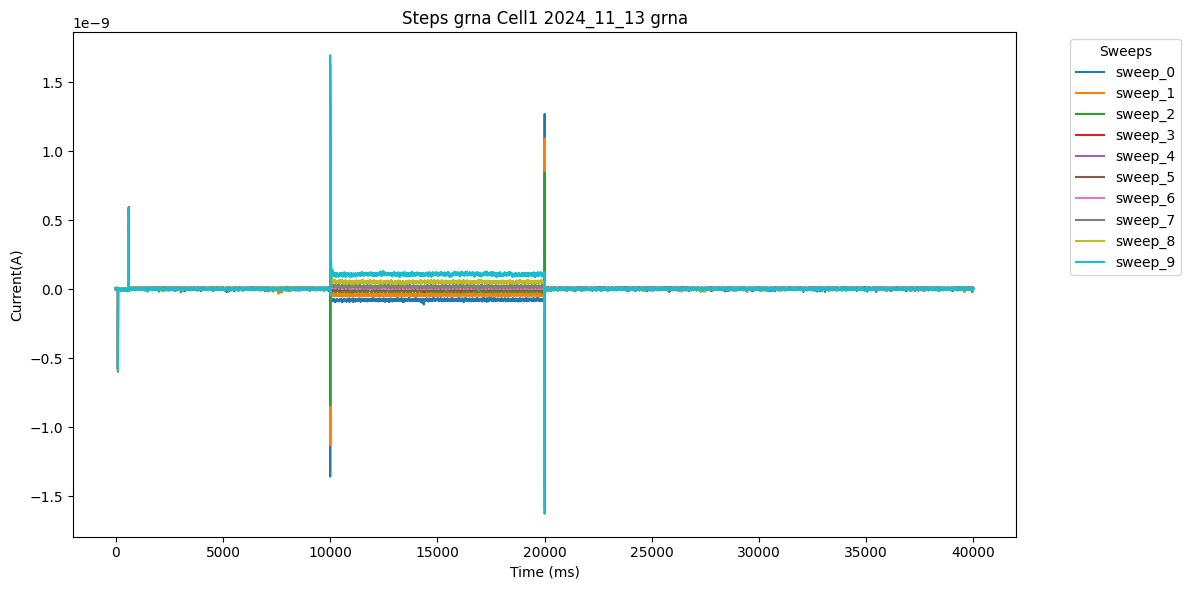

In [ ]:
# Steps 2024_11_13 Cell2 GRNA

# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_5
with h5py.File(file_path_2024_11_13, 'r') as hdf:
    trace_5_group = hdf['data/trace_5']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_0
    for sweep_key in trace_5_group.keys():
        sweep_group = trace_5_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # Extract and plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    grna_steps_cell2_2024_11_13 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {grna_steps_cell2_2024_11_13.shape}")

    # Title and labels
    plt.title('Steps grna Cell1 2024_11_13 grna')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')
#    plt.xlim(9900,10100)
#    plt.ylim(-1e-9,1e-9)

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

ChRead_0 data saved as NumPy array with shape: (40001, 10)


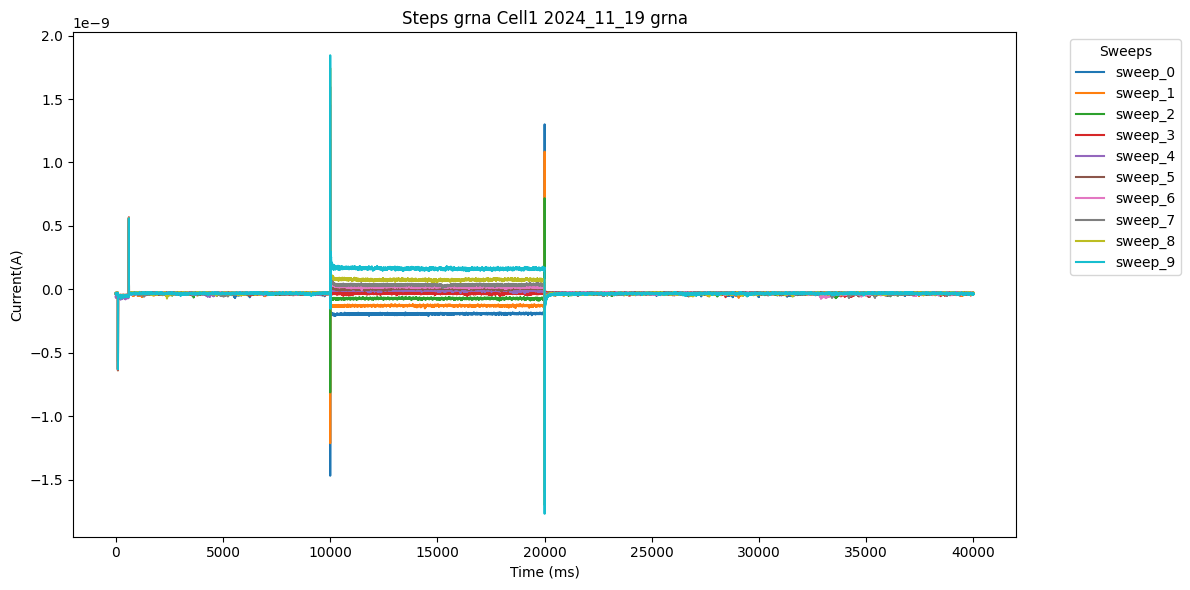

In [ ]:
# Steps 2024_11_19 Cell1 GRNA
file_path_2024_11_19 = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_19.h5"

# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_0
with h5py.File(file_path_2024_11_19, 'r') as hdf:
    trace_0_group = hdf['data/trace_0']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_0
    for sweep_key in trace_0_group.keys():
        sweep_group = trace_0_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # Extract and plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    grna_steps_cell1_2024_11_19 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {grna_steps_cell1_2024_11_19.shape}")

    # Title and labels
    plt.title('Steps grna Cell1 2024_11_19 grna')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')
#    plt.xlim(9900,10100)
#    plt.ylim(-1e-9,1e-9)

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

ChRead_0 data saved as NumPy array with shape: (40001, 10)


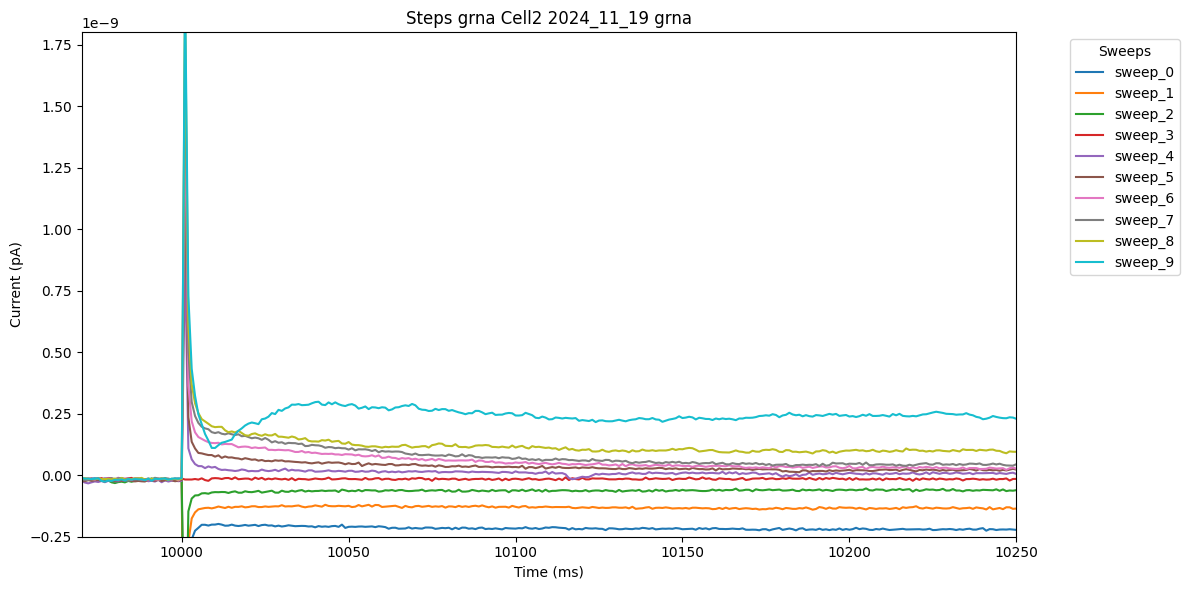

In [ ]:
# Steps 2024_11_19 Cell2 GRNA

# Open the HDF5 file and plot ChRead_0 data for all sweeps in trace_8
with h5py.File(file_path_2024_11_19, 'r') as hdf:
    trace_8_group = hdf['data/trace_8']

    # lists to collect data and save as an array
    ephys_data_list = []
    sweep_labels = []

    plt.figure(figsize=(12, 6))

    # Iterate over all sweeps in trace_8
    for sweep_key in trace_8_group.keys():
        sweep_group = trace_8_group[sweep_key]
        ephys_group = sweep_group['ephys']

        # Extract and plot ChRead_0 data
        ephys_data = ephys_group['ChRead_0'][:]
        ephys_data_list.append(ephys_data)
        sweep_labels.append(sweep_key)
        plt.plot(ephys_data, label=f'{sweep_key}')

    # Stack into a 2D NumPy array where each column is a sweep
    grna_steps_cell2_2024_11_19 = np.vstack(ephys_data_list).T
    # check data is in array
    print(f"ChRead_0 data saved as NumPy array with shape: {grna_steps_cell2_2024_11_19.shape}")

    # Title and labels
    plt.title('Steps grna Cell2 2024_11_19 grna')
    plt.xlabel('Time (ms)')
    plt.ylabel('Current(A)')
    plt.xlim(9970, 10250)
    plt.ylim(-0.25e-9,1.8e-9)

    # Adjust legend
    plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Layout and show plot
    plt.tight_layout()
    plt.show()

In [ ]:
# Combine arrays and average GRNA steps
grna_steps = (grna_steps_cell1_2024_11_13 + grna_steps_cell2_2024_11_13 + grna_steps_cell1_2024_11_19 + grna_steps_cell2_2024_11_19)/4

# Mean normalization
# Extract baseline from 5000 ms to 5100 ms from each trace
grna_baseline_steps = grna_steps[5000:5100,:].mean(axis=0, keepdims=True)
norm_grna_steps = grna_steps- grna_baseline_steps

print(f"grna_steps_df saved as NumPy array with shape: {norm_guangxitoxin_steps.shape}")

grna_steps_df saved as NumPy array with shape: (40001, 10)


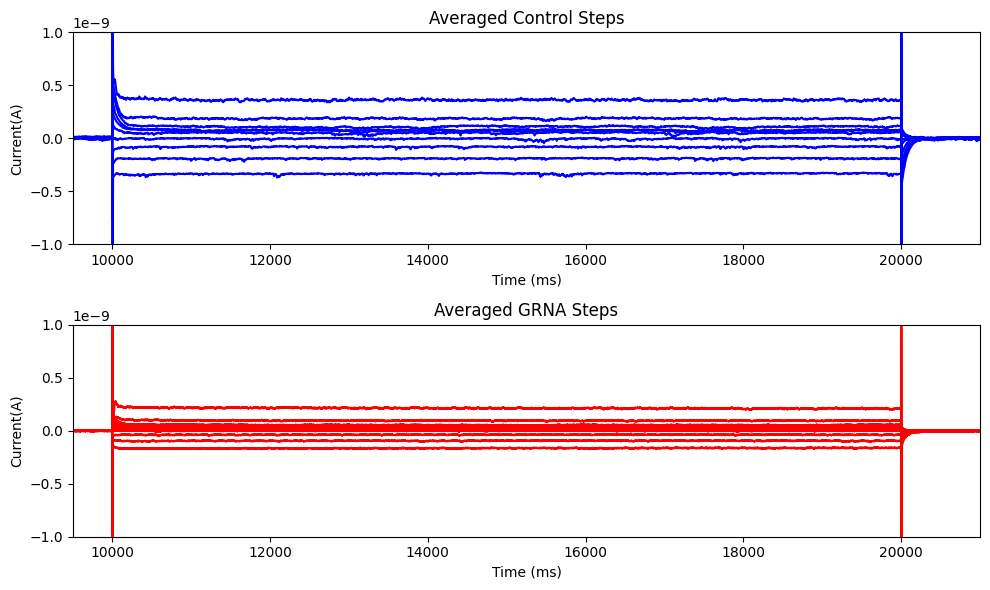

In [ ]:
# Plotting the averaged control and guangxitoxin steps
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Plot control and experimental data
ax[0].plot(norm_control_guangxitoxin_steps, label='Control', color='blue')
ax[1].plot(norm_grna_steps, label='GRNA', color='red')

# adjust axis limits
ax[0].set_xlim(9500, 21000)
ax[0].set_ylim(-1e-9,1e-9)

ax[1].set_xlim(9500, 21000)
ax[1].set_ylim(-1e-9,1e-9)

# Titles and labels
ax[0].set_title('Averaged Control Steps')
ax[1].set_title('Averaged GRNA Steps')

ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')

ax[0].set_ylabel('Current(A)')
ax[1].set_ylabel('Current(A)')

# Adjust layout to make room for the legend
plt.subplots_adjust(hspace=0.4, top=0.9, bottom=0.1)

plt.tight_layout()

# Define the path where you want to save the plot
#save_path = "/content/drive/MyDrive/Data/ePhys/grna_steps.jpg"

# Save the figure to Google Drive as a JPEG file
#plt.savefig(save_path, format='jpeg')

# save a jpg
#plt.savefig(save_path, format='jpeg', quality=95)

plt.show()

**r-geco expression in OPN4 mouse**

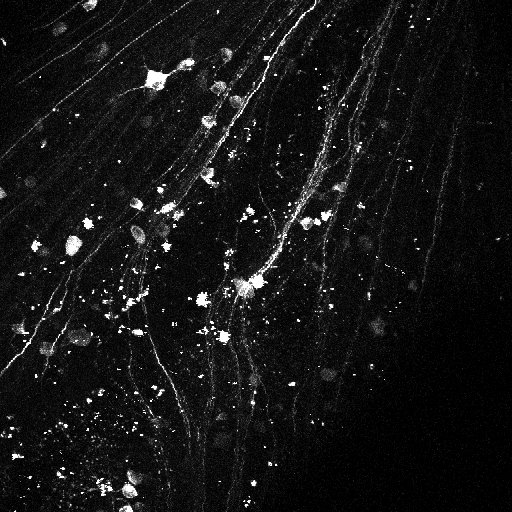


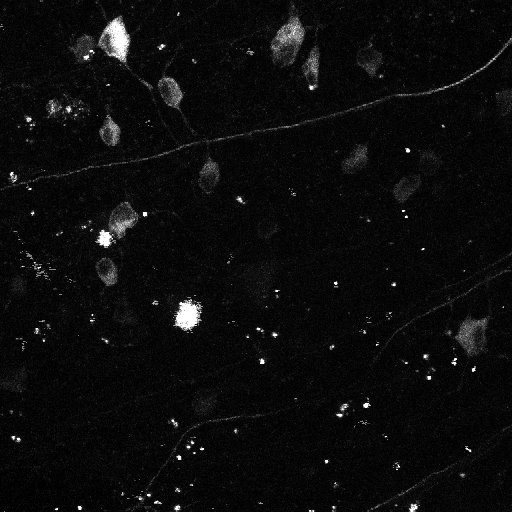

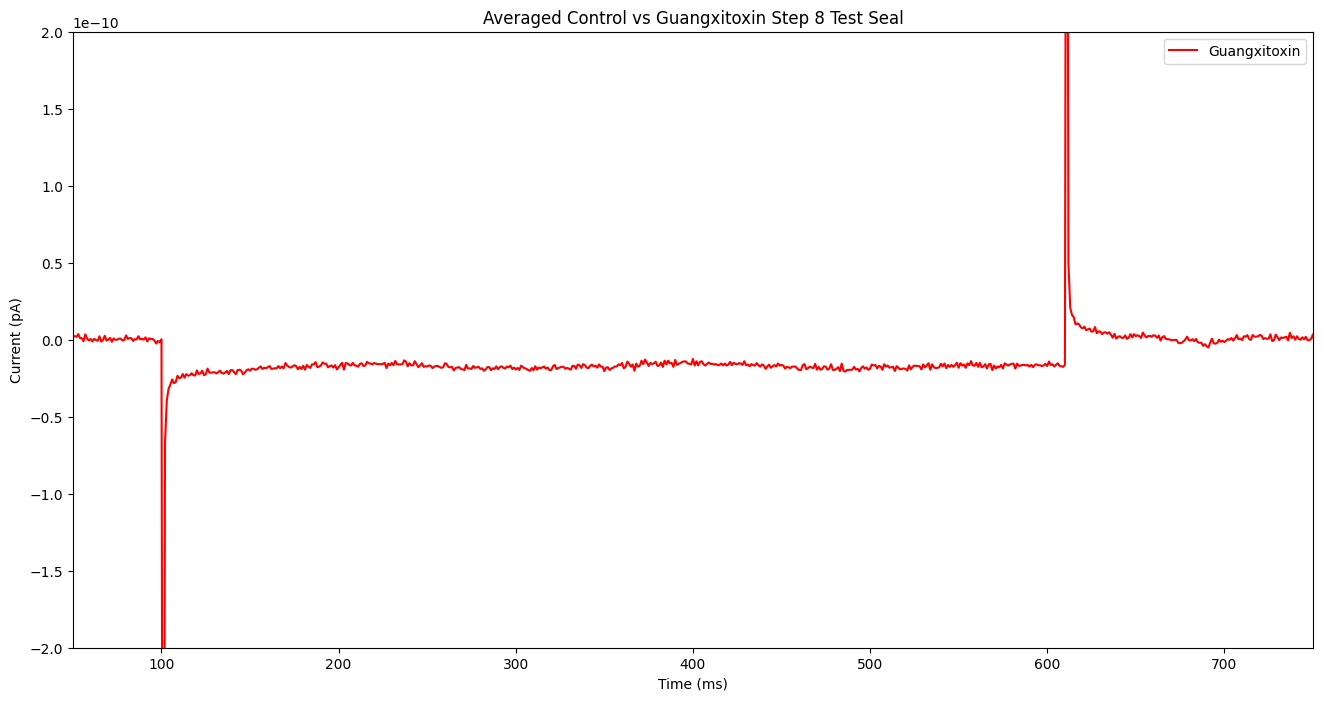

In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.plot(norm_grna_steps[:,8], label='Guangxitoxin', color='red')

# adjust axis dimensions
plt.xlim(50, 750)
plt.ylim(-2e-10,2e-10)

plt.legend(loc='upper right')

plt.title('Averaged Control vs Guangxitoxin Step 8 Test Seal')
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')

plt.show()

Function to plot and convert data to a numpy array

In [3]:
def normalize_steps(file_path, trace_num, baseline_range=(5000, 5100)):
    """
    Normalizes electrophysiology voltage step data from an HDF5 file, plots the data, and returns as a NumPy array.

    Args:
        file_path (str): The path to the HDF5 file.
        trace_number (int): The trace number to analyze.
        baseline_range (tuple): Range of samples to calculate baseline (start, end).

    Returns:
        np.ndarray: A 2D NumPy array where each column is a noralized sweep from the specified trace.

                   Returns None if an error occurs.
    """
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    try:
        with h5py.File(file_path, 'r') as hdf:
            trace_group = hdf[f'data/trace_{trace_num}']
            ephys_data_list = []
            for sweep_key in trace_group.keys():
                sweep_group = trace_group[sweep_key]
                ephys_group = sweep_group['ephys']
                ephys_data = ephys_group['ChRead_0'][:]
                ephys_data_list.append(ephys_data)

            ephys_array = np.vstack(ephys_data_list).T
            # Normalize by the baseline
            baseline_values = ephys_array[baseline_range[0]:baseline_range[1], :].mean(axis=0, keepdims=True)
            normalized_array = ephys_array - baseline_values

            print(f"Normalized data shape: {normalized_array.shape}")

            variable_name = f"{file_name}_trace_{trace_num}"
            print(variable_name)
            globals()[variable_name] = normalized_array

            # plot
            plt.figure(figsize=(6, 3))
            for i in range(normalized_array.shape[1]):
                plt.plot(normalized_array[:, i], label=f'Sweep {i}')

            plt.title(f'Normalized ChRead_0 Data - Trace {trace_num}')
            plt.xlabel('Time (ms)')
            plt.ylabel('current(A)')
            plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
            plt.close()

            return globals()[variable_name]

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [4]:
def normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100)):
    """
    Normalizes electrophysiology voltage step data from an HDF5 file, subtracts out capacitive current,
    plots the data, and returns as a NumPy array.

    Args:
        file_path (str): The path to the HDF5 file.
        trace_number (int): The trace number to analyze.
        baseline_range (tuple): Range of samples to calculate baseline (start, end).

    Returns:
        np.ndarray: A 2D NumPy array where each column is a noralized sweep from the specified trace.

                   Returns None if an error occurs.
    """
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    try:
        with h5py.File(file_path, 'r') as hdf:
            trace_group = hdf[f'data/trace_{trace_num}']
            ephys_data_list = []
            for sweep_key in trace_group.keys():
                sweep_group = trace_group[sweep_key]
                ephys_group = sweep_group['ephys']
                ephys_data = ephys_group['ChRead_0'][:]
                ephys_data_list.append(ephys_data)

            ephys_array = np.vstack(ephys_data_list).T
            # Normalize by the baseline
            baseline_values = ephys_array[baseline_range[0]:baseline_range[1], :].mean(axis=0, keepdims=True)
            normalized_array = ephys_array - baseline_values

            # Subtract out capacitive current
            start_artifact = [10001,10002,10003,10004,10005,10006,10007]
            end_artifact =[20001,20002,20003,20004,20005,20006,20007]
            for sweep in range(normalized_array.shape[1]):
              normalized_array[start_artifact, sweep] += normalized_array[end_artifact, sweep]
              normalized_array[end_artifact, sweep] -= normalized_array[end_artifact, sweep]

            print(f"Normalized data shape: {normalized_array.shape}")

            variable_name = f"{file_name}_trace_{trace_num}"
            print(variable_name)
            globals()[variable_name] = normalized_array

            # plot
            plt.figure(figsize=(6, 3))
            for i in range(normalized_array.shape[1]):
                plt.plot(normalized_array[:, i], label=f'Sweep {i}')

            plt.title(f'Normalized ChRead_0 Data - Trace {trace_num}')
            plt.xlabel('Time (ms)')
            plt.ylabel('current(A)')
            plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
            plt.close()

            return globals()[variable_name]

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

**2uM AUT5**

Normalized data shape: (40001, 10)
iPhys_2024_06_12_1_trace_4


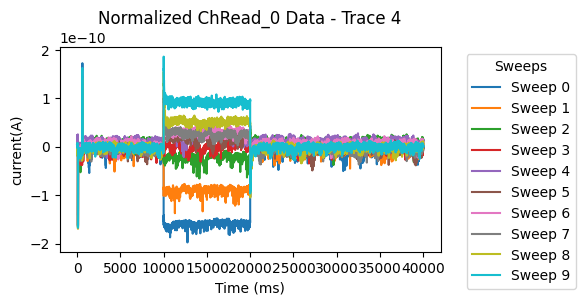

In [5]:
# iPhys_2024_06_12_1  Cell1 Control 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_06_12_1.h5"
trace_num = 4

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_06_12_1_trace_4


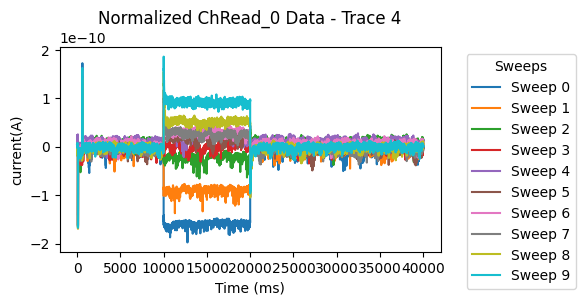

In [6]:
# iPhys_2024_06_12_1  Cell1 Control 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_06_12_1.h5"
trace_num = 4

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_06_19_trace_1


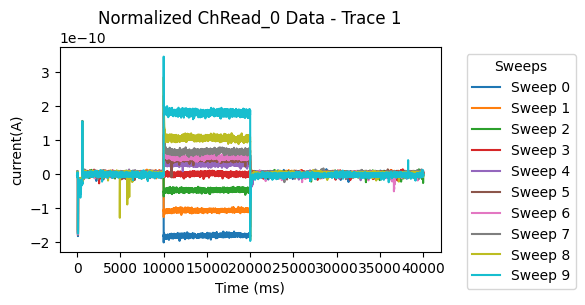

In [7]:
# iPhys_2024_06_19  Cell1 Control 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_06_19.h5"
trace_num = 1

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_06_26_trace_0


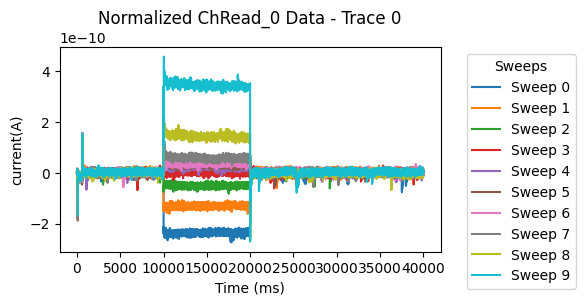

In [8]:
# iPhys_2024_06_26 Cell1 Control 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_06_26.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_08_20_trace_0


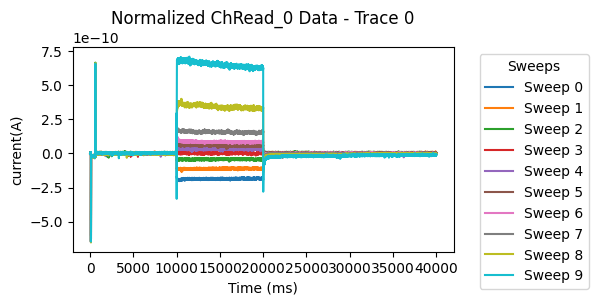

In [9]:
# iPhys_2024_08_20 Cell1 Control 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_08_20.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_09_17_trace_0


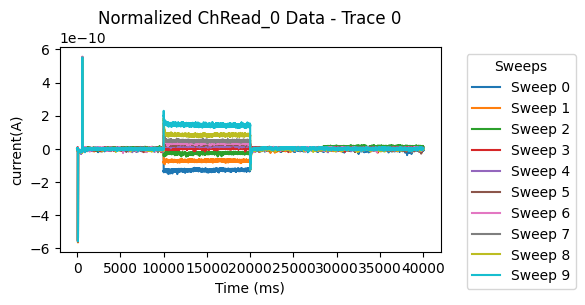

In [10]:
# iPhys_2024_09_17  Cell1 Control 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_09_17.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_06_12_1_trace_18


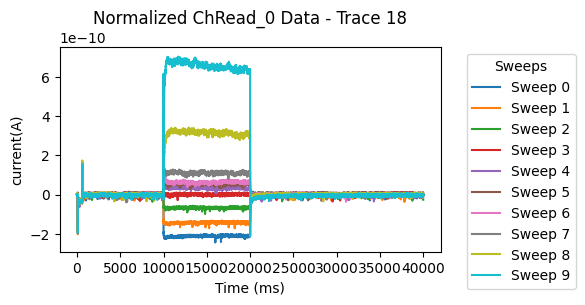

In [11]:
# iPhys_2024_06_12_1 Cell1 with 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_06_12_1.h5"
trace_num = 18

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_06_19_trace_11


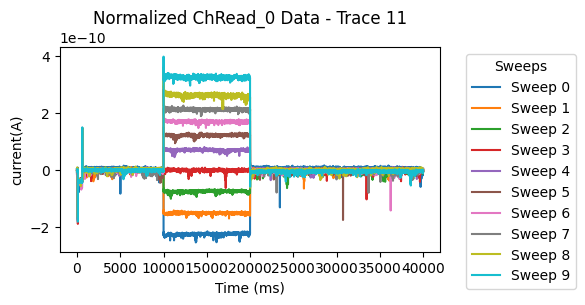

In [12]:
# iPhys_2024_06_19 Cell1 with 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_06_19.h5"
trace_num = 11

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_06_26_trace_7


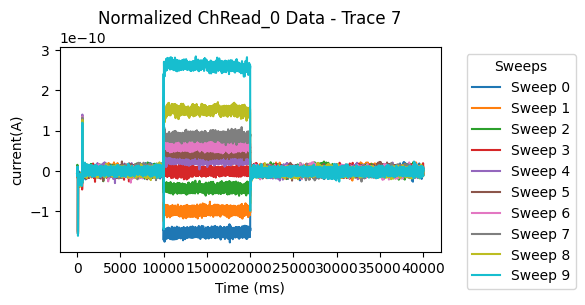

In [13]:
# iPhys_2024_06_26 Cell1 with 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_06_26.h5"
trace_num = 7

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_08_20_trace_8


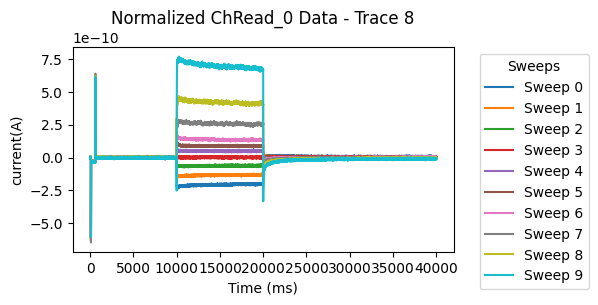

In [14]:
# iPhys_2024_08_20 Cell1 with 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_08_20.h5"
trace_num = 8

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_09_17_trace_8


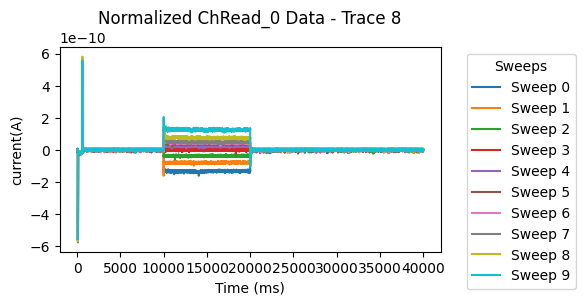

In [15]:
# iPhys_2024_09_17  Cell1 with 2uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_09_17.h5"
trace_num = 8

result = normalize_steps2(file_path, trace_num)

**20 uM AUT5**


Normalized data shape: (40001, 10)
iPhys_2024_10_01_trace_2


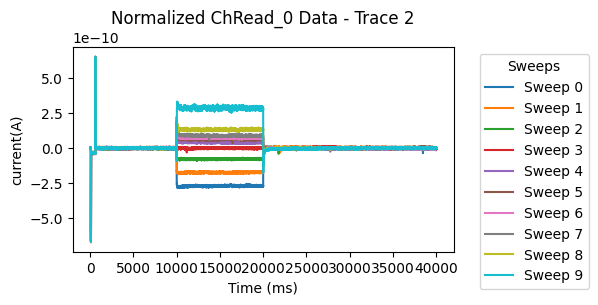

In [16]:
# iPhys_2024_10_01 Cell1 Control 20uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_01.h5"
trace_num = 2

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_11_06_1_trace_0


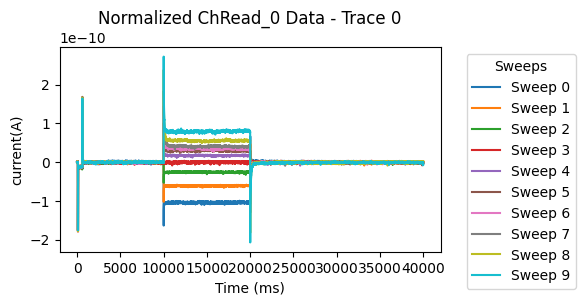

In [17]:
# iPhys_2024_11_06_1 Cell1 Control 20uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_06_1.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num)

(9980.0, 10100.0)

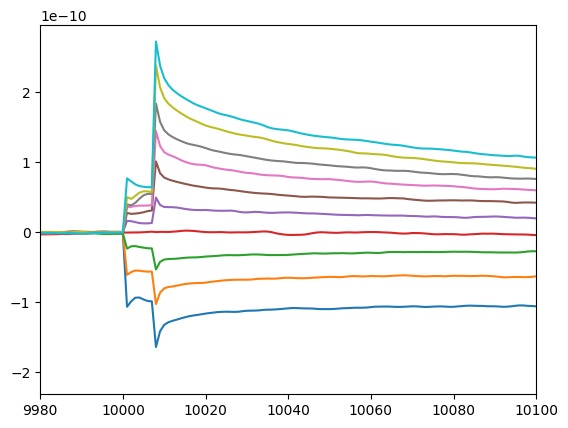

In [18]:
plt.plot(iPhys_2024_11_06_1_trace_0)
plt.xlim(9980, 10100)

Normalized data shape: (40001, 10)
iPhys_2024_11_06_2_trace_9


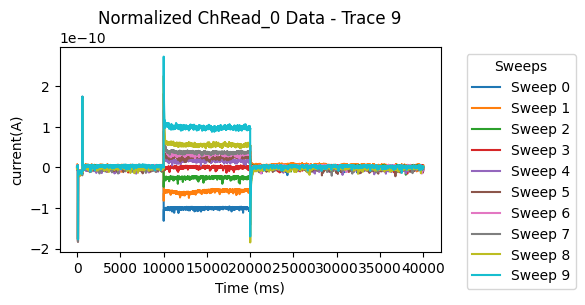

In [19]:
# iPhys_2024_11_06_2 Cell2 Control 20uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_06_2.h5"
trace_num = 9

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_10_01_trace_11


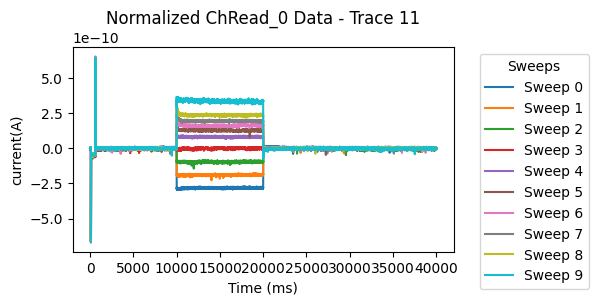

In [20]:
# iPhys_2024_10_01 Cell1 with 20uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_01.h5"
trace_num = 11

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_11_06_2_trace_4


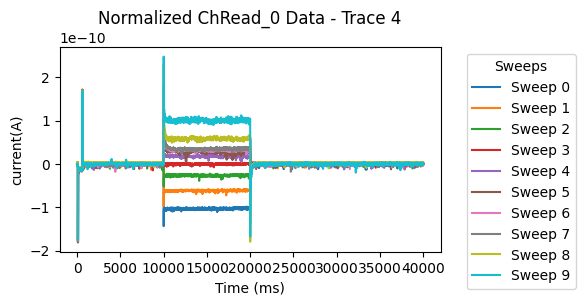

In [21]:
# iPhys_2024_11_06_2 Cell1 with 20uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_06_2.h5"
trace_num = 4

result = normalize_steps2(file_path, trace_num)

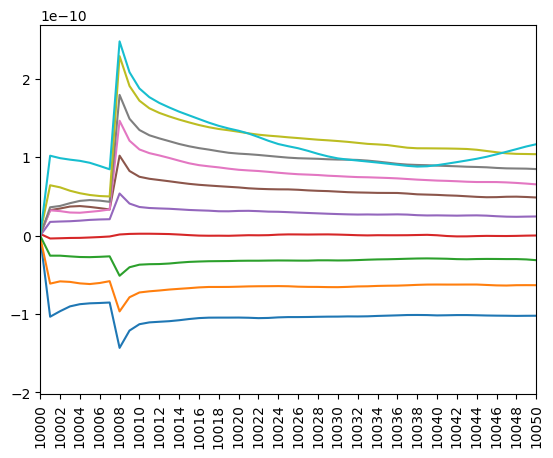

In [ ]:
plt.plot(iPhys_2024_11_06_2_trace_4)
plt.xlim(10000, 10050)
ticks = np.arange(10000, 10051, 2)
plt.xticks(ticks, rotation=90)

# Show the plot
plt.show()

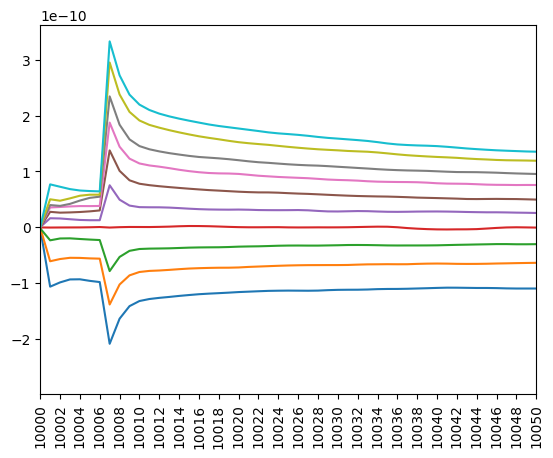

In [ ]:
plt.plot(iPhys_2024_11_06_1_trace_0)
plt.xlim(10000, 10050)
plt.xticks(ticks, rotation=90)

# Show the plot
plt.show()

Normalized data shape: (40001, 10)
iPhys_2024_11_06_2_trace_17


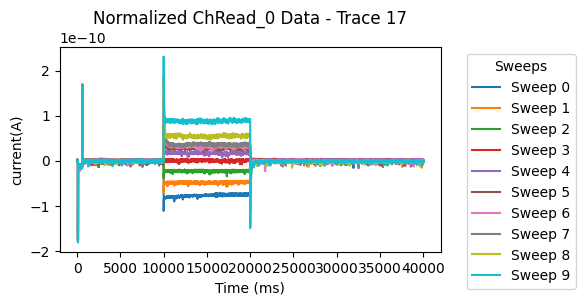

In [22]:
# iPhys_2024_11_06_2 Cell2 with 20uM AUT5
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_06_2.h5"
trace_num = 17

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_10_09_trace_0


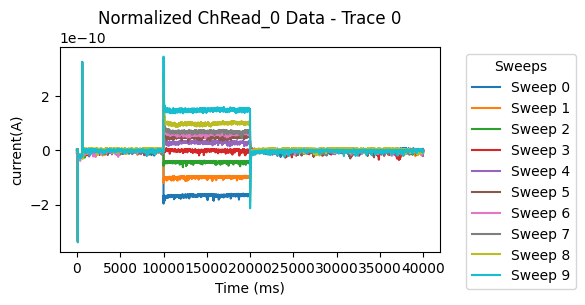

In [23]:
# 2024_10_09 Cell1 Control Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_09.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_10_09_trace_13


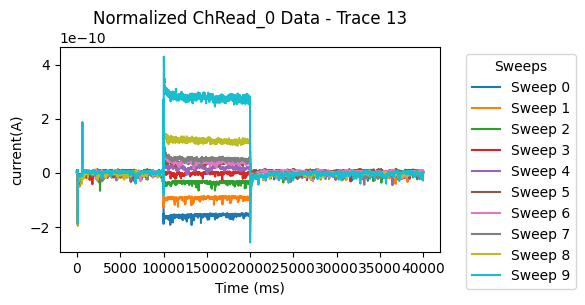

In [24]:
# 2024_10_09 Cell2 Control Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_09.h5"
trace_num = 13
result= normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_10_22_1_trace_1


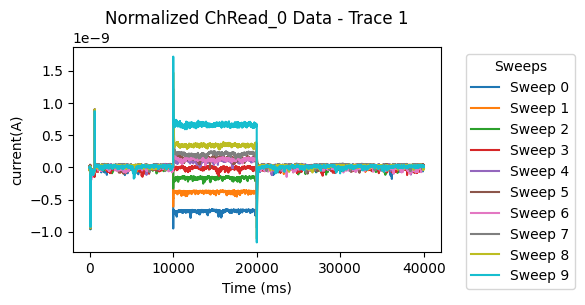

In [25]:
# 2024_10_22_1  Cell1 Control Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_22_1.h5"
trace_num = 1
result= normalize_steps2(file_path, trace_num)

Normalized data shape: (40001, 10)
iPhys_2024_10_09_trace_8


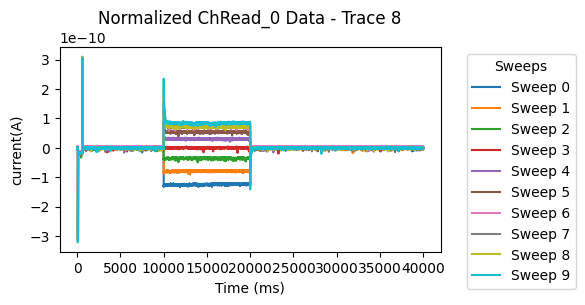

In [26]:
# 2024_10_09 Cell1 Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_09.h5"
trace_num = 8

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2024_10_09_trace_22


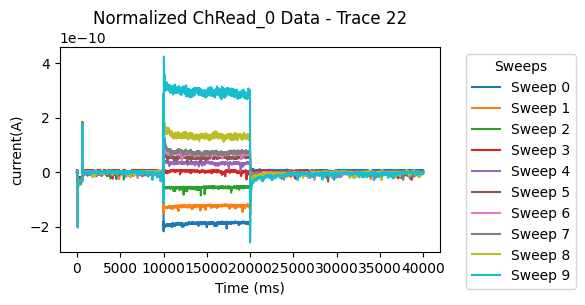

In [27]:
# 2024_10_09 Cell2 Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_09.h5"
trace_num = 22

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2024_10_22_1_trace_9


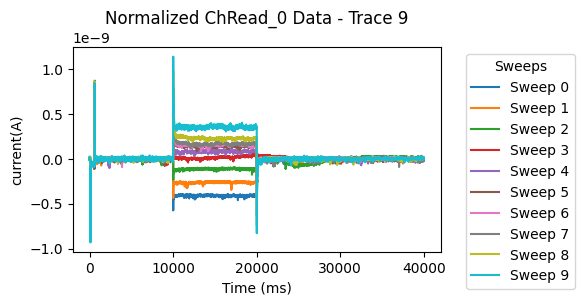

In [28]:
# 2024_10_22_1 Cell1 Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_10_22_1.h5"
trace_num = 9

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_01_08_trace_0


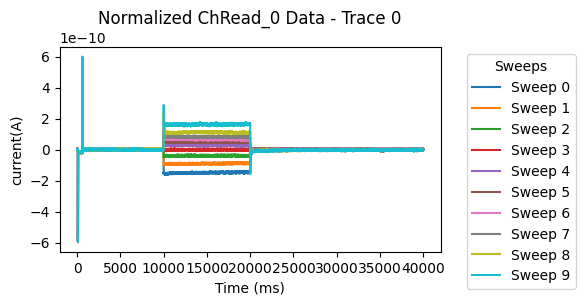

In [29]:
# 2025_01_08 Cell1 Control Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_08.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (50001, 11)
iPhys_2025_01_08_trace_3


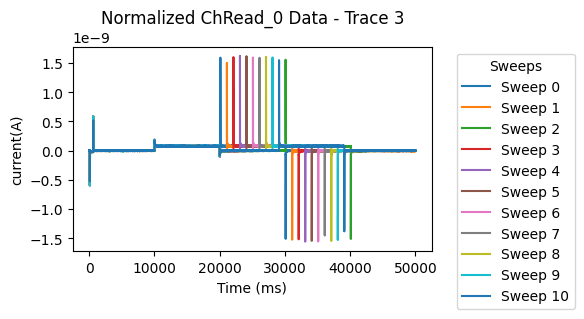

In [30]:
# 2025_01_08 Cell1 Control Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_08.h5"
trace_num = 3

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

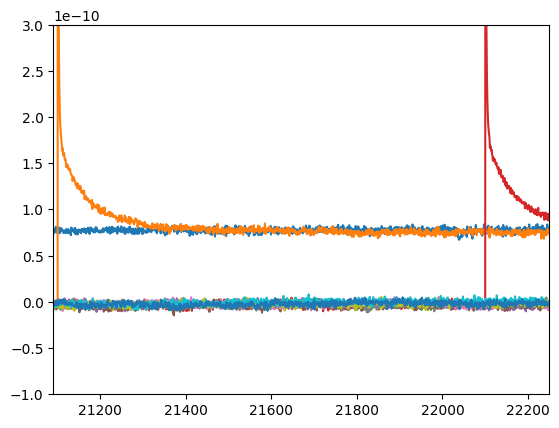

In [ ]:
plt.plot(iPhys_2025_01_08_trace_3)
plt.xlim(21090, 22250)
plt.ylim(-0.1e-9,0.3e-9)

# Show the plot
plt.show()

In [ ]:
# Define the starting time point
start_cut = 20095
window_size = 1000

# Remove data for each sweep starting from the second
for sweep in range(1, iPhys_2025_01_08_trace_3.shape[1]):
    end_cut = start_cut + window_size

    # Remove the specified time range for this sweep
    iPhys_2025_01_08_trace_3[start_cut:end_cut, sweep] -= iPhys_2025_01_08_trace_3[start_cut:end_cut, sweep]

    window_size += 1000


In [ ]:
iPhys_2025_01_08_trace_3.shape[0]

50001

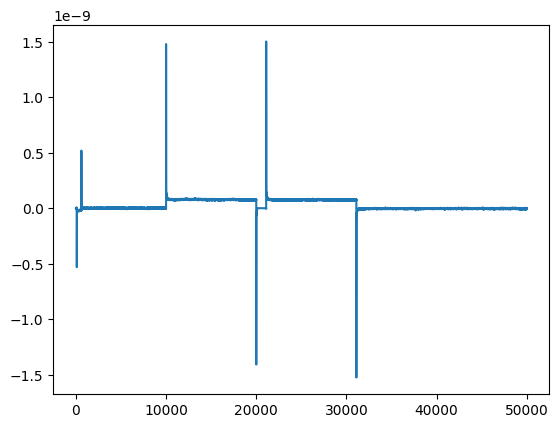

In [ ]:
plt.plot(iPhys_2025_01_08_trace_3[:,1])
#plt.xlim(20005, 22100)

Normalized data shape: (40001, 10)
iPhys_2025_01_08_trace_9


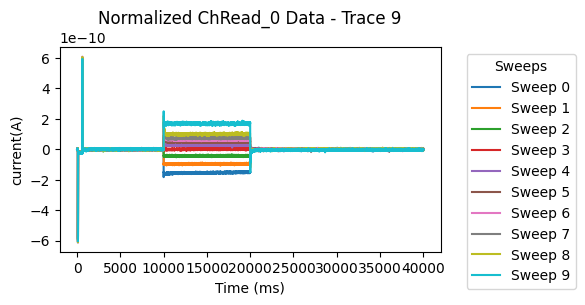

In [31]:
# 2025_01_08 Cell1 Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_08.h5"
trace_num = 9

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_01_28_trace_3


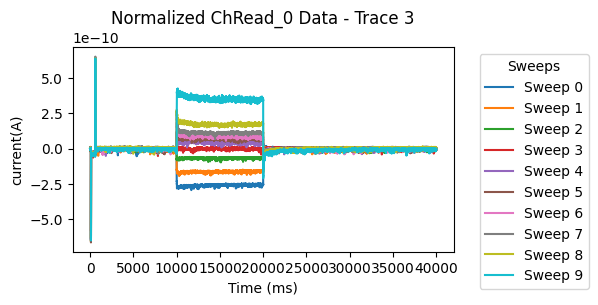

In [32]:
# 2025_01_28 Cell2 Control Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_28.h5"
trace_num = 3

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_01_28_trace_11


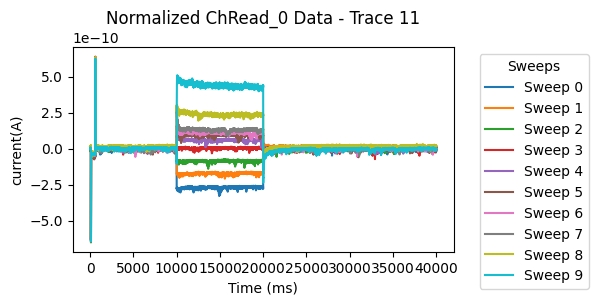

In [33]:
# 2025_01_28 Cell2 Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_28.h5"
trace_num = 11

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_01_28_trace_20


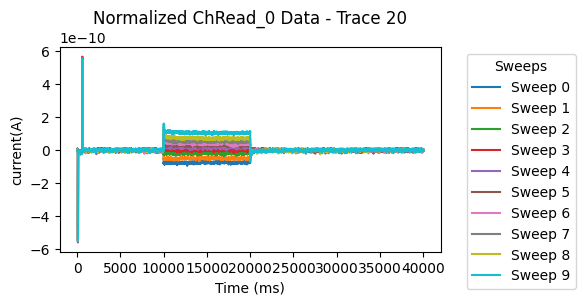

In [34]:
# 2025_01_28 Cell4 Control Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_28.h5"
trace_num = 20

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_01_28_trace_30


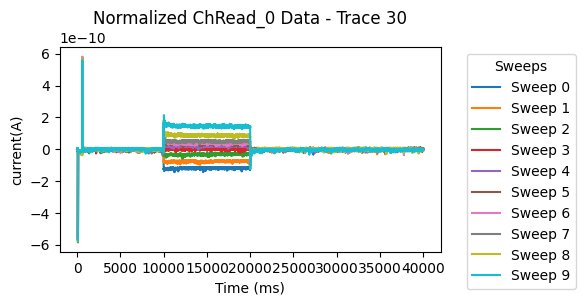

In [35]:
# 2025_01_28 Cell4 Guangxitoxin
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_28.h5"
trace_num = 30

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

**10 uM AUT1**

Normalized data shape: (40001, 10)
iPhys_2025_01_29_trace_4


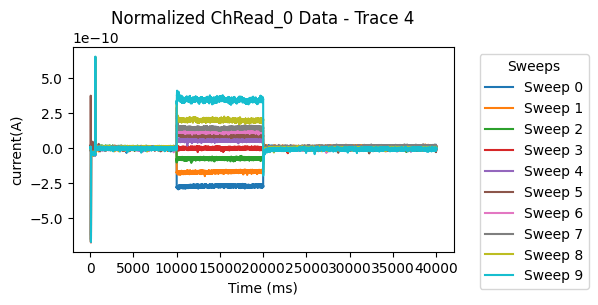

In [36]:
# 2025_01_29 Cell1 Control GAUT1
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_29.h5"
trace_num = 4

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_01_29_trace_12


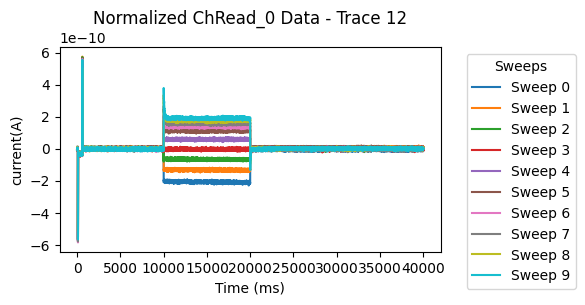

In [37]:
# 2025_01_29 Cell1 GAUT1
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_01_29.h5"
trace_num = 12

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_02_04_trace_11


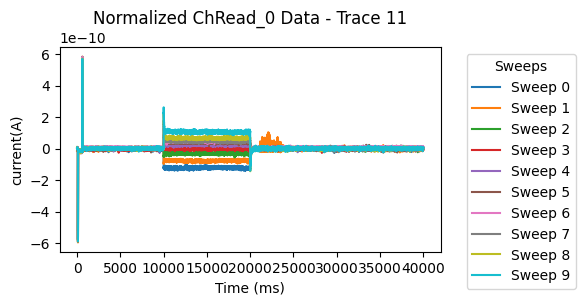

In [38]:
# 2025_02_04 Cell3 Control GAUT1
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_02_04.h5"
trace_num = 11

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_02_04_trace_19


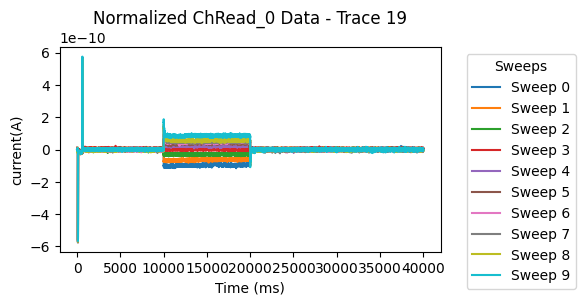

In [39]:
# 2025_02_04 Cell3 GAUT1
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_02_04.h5"
trace_num = 19

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_02_04_trace_25


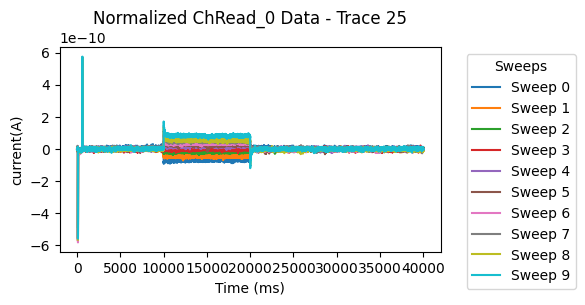

In [40]:
# 2025_02_04 Cell4 Control GAUT1
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_02_04.h5"
trace_num = 25

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2025_02_04_trace_33


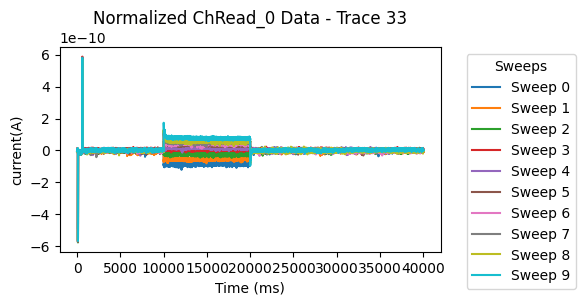

In [41]:
# 2025_02_04 Cell4 GAUT1
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2025_02_04.h5"
trace_num = 33

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

In [44]:
# Combine Arrrays
steps_2aut5_control = np.array([iPhys_2024_06_12_1_trace_4, iPhys_2024_06_19_trace_1, iPhys_2024_06_26_trace_0, iPhys_2024_08_20_trace_0, iPhys_2024_09_17_trace_0])
steps_2aut5 = np.array([iPhys_2024_06_26_trace_7, iPhys_2024_08_20_trace_8, iPhys_2024_09_17_trace_8])
steps_20aut5_control = np.array([iPhys_2024_10_01_trace_2, iPhys_2024_11_06_1_trace_0, iPhys_2024_11_06_2_trace_9])
steps_20aut5 = np.array([iPhys_2024_10_01_trace_11, iPhys_2024_11_06_2_trace_4, iPhys_2024_11_06_2_trace_17])
steps_guangxitoxin_control = np.array([iPhys_2024_10_09_trace_0, iPhys_2024_10_09_trace_13, iPhys_2024_10_22_1_trace_1, iPhys_2025_01_08_trace_0, iPhys_2025_01_28_trace_3, iPhys_2025_01_28_trace_20])
steps_guangxitoxin = np.array([iPhys_2024_10_09_trace_8, iPhys_2024_10_09_trace_22, iPhys_2024_10_22_1_trace_9, iPhys_2025_01_08_trace_9, iPhys_2025_01_28_trace_11, iPhys_2025_01_28_trace_30])
steps_10aut1_control = np.array([iPhys_2025_01_29_trace_4, iPhys_2025_02_04_trace_11, iPhys_2025_02_04_trace_25])
steps_10aut1 = np.array([iPhys_2025_01_29_trace_12, iPhys_2025_02_04_trace_19, iPhys_2025_02_04_trace_33])
#steps_control = np.hstack(steps_control)

# pooled control stpes
steps_pooled_control = np.array([iPhys_2024_10_01_trace_2, iPhys_2024_11_06_1_trace_0, iPhys_2024_11_06_2_trace_9,
                                 iPhys_2024_10_09_trace_0, iPhys_2024_10_09_trace_13, iPhys_2024_10_22_1_trace_1,
                                 iPhys_2024_06_12_1_trace_4, iPhys_2024_06_19_trace_1, iPhys_2024_06_26_trace_0,
                                 iPhys_2024_08_20_trace_0, iPhys_2024_09_17_trace_0])

# Check the shape of arrays
print(f"2uM aut array shape: {steps_2aut5.shape}")
print(f"20uM aut array shape: {steps_20aut5.shape}")
print(f"guangxitoxin array shape: {steps_guangxitoxin.shape}")
print(f"pooled control array shape: {steps_pooled_control.shape}")

2uM aut array shape: (3, 40001, 10)
20uM aut array shape: (3, 40001, 10)
guangxitoxin array shape: (6, 40001, 10)
pooled control array shape: (11, 40001, 10)


In [ ]:
# Mean and Standard Error for Currents
# Time points
time_points = [[10005, 10006], [11000, 11010]]

# Initialize dictionaries for results
means = {}
errors = {}

# Iterate over sweeps
for sweep_idx in range(steps_guangxitoxin_control[0].shape[1]):
    sweep_means = []
    sweep_errors = []

    # Iterate over time ranges
    for start, end in time_points:
        sweep_data = np.array([trace[start:end, sweep_idx] for trace in steps_guangxitoxin_control])

        # Calculate mean and standard error
        mean_val = sweep_data.mean()
        error_val = sweep_data.std(ddof=1) / np.sqrt(sweep_data.shape[0])  # SEM: std / sqrt(n)

        sweep_means.append(mean_val)
        sweep_errors.append(error_val)

    # Store results
    means[f"Sweep {sweep_idx + 1}"] = sweep_means
    errors[f"Sweep {sweep_idx + 1}"] = sweep_errors

# Convert results to DataFrames
mean_df = pd.DataFrame(means, index=["Transient", "Sustained"])
error_df = pd.DataFrame(errors, index=["Transient", "Sustained"])

# Display the results
print("Mean values:")
print(mean_df)
print("\nErrors (SEM):")
print(error_df)

Mean values:
                Sweep 1       Sweep 2       Sweep 3       Sweep 4  \
Transient -2.625385e-10 -1.259088e-10 -8.843874e-11 -1.161987e-11   
Sustained -2.874429e-10 -1.760342e-10 -6.884399e-11 -9.210200e-13   

                Sweep 5       Sweep 6       Sweep 7       Sweep 8  \
Transient  5.140867e-11  8.226861e-11  8.603328e-11  1.080108e-10   
Sustained  5.031067e-11  7.279786e-11  7.041839e-11  1.061111e-10   

                Sweep 9      Sweep 10  
Transient  1.552909e-10  2.745981e-10  
Sustained  1.641139e-10  3.128957e-10  

Errors (SEM):
                Sweep 1       Sweep 2       Sweep 3       Sweep 4  \
Transient  1.265394e-10  4.329343e-11  5.109775e-11  1.196297e-11   
Sustained  1.112557e-10  7.121401e-11  2.621962e-11  1.505910e-12   

                Sweep 5       Sweep 6       Sweep 7       Sweep 8  \
Transient  2.482982e-11  3.368993e-11  2.429929e-11  4.284290e-11   
Sustained  2.065630e-11  2.466654e-11  1.335950e-11  3.398170e-11   

                Swee

In [45]:
def voltage_sustained_current_plot(control, manipulation, time_window, voltage_steps, experiment_name=None, current_type=None, num_controls=None):
    """
    Plots voltage vs mean current for control and experimental conditions with SEM

    args:
      control (NumPy array): control current traces of shape (num_traces, num_samples)
      manipulation (NumPy array): experimental manipulation current traces of shape (num_traces, num_samples)
      time_window (tuple): time window for current analysis in milliseconds (start, end)
      voltage_steps (list): list of voltage steps
      drug_name (str or None): Name of the drug/experimental condition (default is None)
      current_type (str or None): Type of current, sustained or transient (default is None)
      num_controls (int): Number of control traces (default is None)

    returns:
      Plot of voltage vs mean current with SEM
    """
    # Initialize arrays for mean currents
    mean_currents_control = []
    mean_currents_manipulation = []

    # Iterate over voltage steps - control
    for sweep_idx, voltage in enumerate(voltage_steps):
        # Extract current data for the specified time window
        current_data = np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in control])

        # Compute mean of traces for this voltage
        mean_current = current_data.mean()
        mean_currents_control.append(mean_current)

    # Iterate over voltage steps - manipulation
    for sweep_idx, voltage in enumerate(voltage_steps):
        # Extract current data for the specified time window
        current_data = np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in manipulation])

        # Compute mean of traces for this voltage
        mean_current = current_data.mean()
        mean_currents_manipulation.append(mean_current)

    # Convert results to NumPy arrays for plotting
    mean_currents_control = np.array(mean_currents_control)
    mean_currents_drug = np.array(mean_currents_manipulation)

    # Compute SEM for control and experimental conditions
    sem_currents_control = [
        np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in control]).std(ddof=1) / np.sqrt(len(control))
        for sweep_idx in range(len(voltage_steps))
    ]
    sem_currents_manipulation = [
        np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in manipulation]).std(ddof=1) / np.sqrt(len(manipulation))
        for sweep_idx in range(len(voltage_steps))
    ]

    # Create labels for the legend
    control_label = f'Control, n={num_controls}' if num_controls else 'Control'
    manipulation_label = f'{experiment_name}' if experiment_name else 'Manipulation'

    # Create labels for the title
    current_type_label = f'Voltage-Steps vs {current_type} Current' if current_type else 'Current'

    # Plot voltage vs current
    plt.figure(figsize=(8, 6))
    plt.errorbar(voltage_steps, mean_currents_control, yerr=sem_currents_control, fmt='o-', color='b', ecolor='r', capsize=5, label=control_label)
    plt.errorbar(voltage_steps, mean_currents_drug, yerr=sem_currents_manipulation, fmt='o-', color='g', ecolor='r', capsize=5, label=manipulation_label)
    plt.title(current_type_label)
    plt.xlabel('Voltage Steps(mV)')
    plt.ylabel('Mean Current(pA)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()


In [46]:
def voltage_transient_current_plot(control, manipulation, current_time_window, baseline_time_window, voltage_steps, experiment_name=None, current_type=None, num_controls=None):
    """
    Plots voltage vs mean current for control and experimental conditions with SEM

    args:
      control (NumPy array): control current traces of shape (num_traces, num_samples)
      manipulation (NumPy array): experimental manipulation current traces of shape (num_traces, num_samples)
      current_time_window (tuple): time window for transient current analysis in milliseconds (start, end)
      baseline_time_window (tuple): time window for sustained current in milliseconds (start, end)
      voltage_steps (list): list of voltage steps
      drug_name (str or None): Name of the drug/experimental condition (default is None)
      current_type (str or None): Type of current, sustained or transient (default is None)
      num_controls (int): Number of control traces (default is None)

    returns:
      Plot of voltage vs mean current with SEM
    """
    # Initialize arrays for mean currents
    mean_currents_control = []
    mean_currents_manipulation = []

    # Iterate over voltage steps - control
    for sweep_idx, voltage in enumerate(voltage_steps):
        # Extract baseline current data for the specified time window
        baseline_data = np.array([trace[baseline_time_window[0]:baseline_time_window[1], sweep_idx].mean() for trace in control])
        # Extract current data for the specified time window
        current_data = np.array([trace[current_time_window[0]:current_time_window[1], sweep_idx].mean() for trace in control])

        # Compute mean of traces for this voltage
        mean_baseline = baseline_data.mean()
        mean_current = current_data.mean()
        # Normalize the mean transient current response by subtracting the mean sustained curent
        mean_current -= mean_baseline
        mean_currents_control.append(mean_current)

    # Iterate over voltage steps - manipulation
    for sweep_idx, voltage in enumerate(voltage_steps):
        # Extract baseline current data for the specified time window
        baseline_data = np.array([trace[baseline_time_window[0]:baseline_time_window[1], sweep_idx].mean() for trace in manipulation])
        # Extract current data for the specified time window
        current_data = np.array([trace[current_time_window[0]:current_time_window[1], sweep_idx].mean() for trace in manipulation])

        # Compute mean of traces for this voltage
        mean_baseline = baseline_data.mean()
        mean_current = current_data.mean()
        # Normalize the mean transient current response by subtracting the mean sustained curent
        mean_current -= mean_baseline
        mean_currents_manipulation.append(mean_current)

    # Convert results to NumPy arrays for plotting
    mean_currents_control = np.array(mean_currents_control)
    mean_currents_drug = np.array(mean_currents_manipulation)

    # Compute SEM for control and experimental conditions
    sem_currents_control = [
        np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in control]).std(ddof=1) / np.sqrt(len(control))
        for sweep_idx in range(len(voltage_steps))
    ]
    sem_currents_manipulation = [
        np.array([trace[time_window[0]:time_window[1], sweep_idx].mean() for trace in manipulation]).std(ddof=1) / np.sqrt(len(manipulation))
        for sweep_idx in range(len(voltage_steps))
    ]

    # Create labels for the legend
    control_label = f'Control, n={num_controls}' if num_controls else 'Control'
    manipulation_label = f'{experiment_name}' if experiment_name else 'Manipulation'

    # Create labels for the title
    current_type_label = f'Voltage-Steps vs {current_type} Current' if current_type else 'Current'

    # Plot voltage vs current
    plt.figure(figsize=(8, 6))
    plt.errorbar(voltage_steps, mean_currents_control, yerr=sem_currents_control, fmt='o-', color='b', ecolor='r', capsize=5, label=control_label)
    plt.errorbar(voltage_steps, mean_currents_drug, yerr=sem_currents_manipulation, fmt='o-', color='g', ecolor='r', capsize=5, label=manipulation_label)
    plt.title(current_type_label)
    plt.xlabel('Voltage Steps(mV)')
    plt.ylabel('Mean Current(pA)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

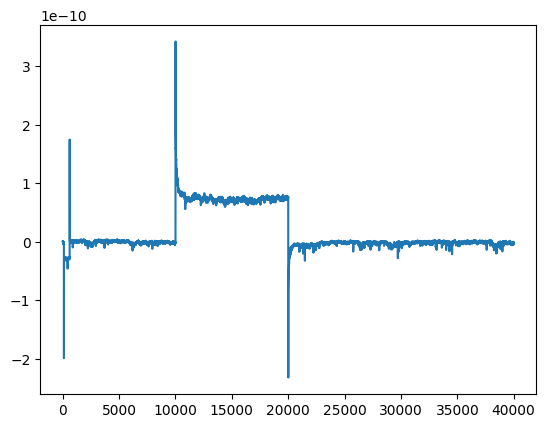

In [ ]:
sweep7 = iPhys_2024_10_09_trace_22[:,7]
plt.plot(sweep7)

In [47]:
def exponential_decay(x, a, tau, c):
    """Exponential decay function"""
    return a * np.exp(-(x) / tau) + c

Fitted parameters: a=9.577332884151146e-11, tau=99.1576075941919, c=8.232174559332994e-11
The deacy time, 99.1576075941919


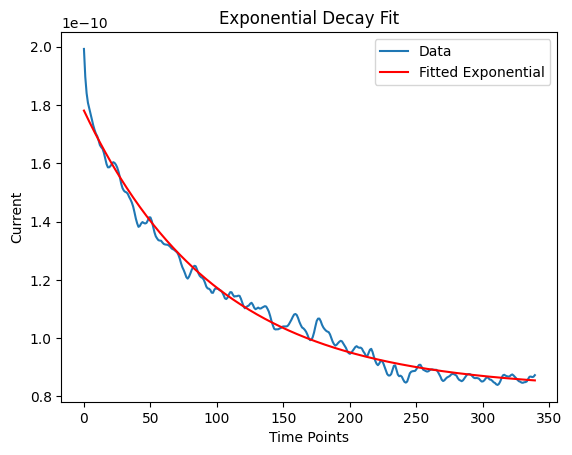

In [ ]:
sweep7_section = sweep7[10010:10350]
time_points = np.arange(10350-10010)

# Parameter estimates
a = np.max(sweep7_section) - np.min(sweep7_section)
tau = 40  # An estimate of the decay time constant
c = np.min(sweep7_section)

# Fit the exponential decay function
try:
    popt, pcov = curve_fit(exponential_decay, time_points, sweep7_section, p0=[a, tau, c])
    a_fit, tau_fit, c_fit = popt
    print(f"Fitted parameters: a={a_fit}, tau={tau_fit}, c={c_fit}")

    # Fitted curve
    fitted_curve = exponential_decay(time_points, a_fit, tau_fit, c_fit)
    print(f"The deacy time, {popt[1]}")

    # Plot the original data and the fitted curve
    plt.plot(time_points, sweep7_section, label='Data')
    plt.plot(time_points, fitted_curve, label='Fitted Exponential', color='red')
    plt.xlabel('Time Points')
    plt.ylabel('Current')
    plt.title('Exponential Decay Fit')
    plt.legend()
    plt.show()

except RuntimeError:
    print("Optimal parameters not found")


In [ ]:
print(a, tau, c)
print(a_fit, tau_fit,c_fit)
print(time_points.shape)

8.05664e-11 5 7.802918e-11
6.288444776734808e-11 66.30625140085719 8.010009893758061e-11
(295,)


In [ ]:
def measure_and_plot_decay_time(sweeps, voltage_steps, time_window, experiment_name=None):
    """
    Fits exponential decay for each sweep, and measures and returns decay times.

    Args:
        sweeps (NumPy array): Current traces of shape (num_sweeps, num_samples).
        voltage_steps (list): List of voltage steps corresponding to each sweep.
        time_window (tuple): Tuple (start_idx, end_idx) indicating the time window for decay fitting.
        experiment_name (str or None): Name of the experiment (default is None).

    Returns:
        Plot of voltage vs decay time.
    """
    decay_times = []

    # Extract time window indices
    start_idx, end_idx = time_window
    time_points = np.arange(end_idx-start_idx)

    # Iterate over sweeps
    for i, sweep in enumerate(sweeps.T):
      sweep_window = sweep[start_idx:end_idx]
      # Parameter estimates
      a = np.max(sweep_window) - np.min(sweep_window)
      tau = 40  # An estimate of the decay time constant
      c = np.min(sweep_window)

      # Fit exponential decay function to the current trace within the time window
      try:
          # Exponetial curve fitting
          popt, pcov = curve_fit(exponential_decay, time_points, sweep_window, p0=[a, tau, c])
          _, tau_fit, _ = popt  # Extract decay time constant (tau)
          if tau_fit > tau * 3:
            tau_fit = 0
          decay_times.append(tau_fit)

      except RuntimeError:
          print(f"Could not fit exponential decay to sweep {i}.")
          decay_times.append(np.nan)  # Append NaN if fit fails

    # Plot voltage vs decay time
    plt.figure(figsize=(8, 6))
    plt.plot(voltage_steps, decay_times, marker='o', linestyle='-')
    plt.xlabel('Voltage Step (mV)')
    plt.ylabel('Decay Time (ms)')
    plt.title(f'Voltage vs Decay Time{f" ({experiment_name})" if experiment_name else ""}')
    plt.grid(True)
    plt.show()

In [ ]:
steps_guangxitoxin_control = np.array([iPhys_2024_10_09_trace_0, iPhys_2024_10_09_trace_13, iPhys_2024_10_22_1_trace_1, iPhys_2025_01_08_trace_0])
steps_guangxitoxin = np.array([iPhys_2024_10_09_trace_8, iPhys_2024_10_09_trace_22, iPhys_2024_10_22_1_trace_9, iPhys_2025_01_08_trace_9])

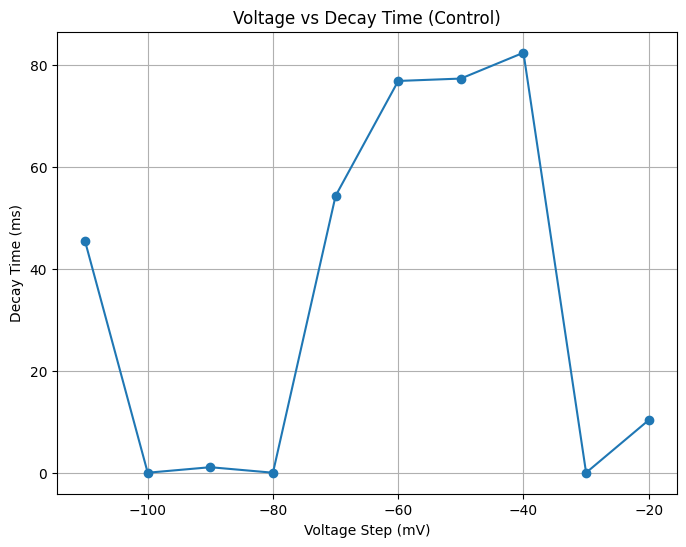

In [ ]:
sweeps = iPhys_2024_10_09_trace_22
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (10007, 10501)
experiment_name = 'Control'

measure_and_plot_decay_time(sweeps, voltage_steps, time_window, experiment_name)

In [ ]:
def exp_decay_plot(sweeps_group, voltage_steps, time_window, tau):
    """
    Fits exponential decay for each sweep, and measures and returns decay timess.

    Args:
        sweeps_group (NumPy array): current traces of shape (num_traces, num_samples)
        voltage_steps (list): List of voltage steps corresponding to each sweep.
        time_window (tuple): Tuple (start_idx, end_idx) indicating the time window for decay fitting.
        tau (integer): an estimate of the exponential decay time constant.

    Returns:
        Plot of voltage vs mean decay time with S.E.M. for the group of experiments.
    """
    decay_times_group = []

    # Extract time window indices
    start_idx, end_idx = time_window
    time_points = np.arange(end_idx - start_idx)

    # Iterate over each experiment in the group
    for experiment_idx, sweeps in enumerate(sweeps_group):
        decay_times = []

        # Iterate over sweeps in the current experiment
        for i, sweep in enumerate(sweeps.T):
            sweep_window = sweep[start_idx:end_idx]
            # Parameter estimates
            a = np.max(sweep_window) - np.min(sweep_window)
            tau_estimate = tau  # An estimate of the decay time constant
            c = np.min(sweep_window)

            # Fit exponential decay function to the current trace within the time window
            try:
                # Exponential curve fitting
                popt, _ = curve_fit(exponential_decay, time_points, sweep_window, p0=[a, tau_estimate, c])
                _, tau_fit, _ = popt  # Extract decay time constant (tau)
                if tau_fit > tau_estimate * 3:
                  tau_fit = 0
                decay_times.append(tau_fit)

            except RuntimeError:
                print(f"Could not fit exponential decay to sweep {i} in experiment {experiment_names[experiment_idx] if experiment_names else experiment_idx}.")
                decay_times.append(np.nan)  # Append NaN if fit fails

        # Store the decay times for the current experiment
        decay_times_group.append(decay_times)

    # Calculate mean and SEM across all experiments for each voltage step
    decay_times_group = np.array(decay_times_group)  # Convert to NumPy array for easier calculations
    mean_decay_times = np.nanmean(decay_times_group, axis=0)
    sem_decay_times = np.nanstd(decay_times_group, axis=0) / np.sqrt(np.count_nonzero(~np.isnan(decay_times_group), axis=0))

    # Plot voltage vs mean decay time with S.E.M.
    plt.figure(figsize=(8, 6))
    plt.errorbar(voltage_steps, mean_decay_times, yerr=sem_decay_times, fmt='o', linestyle='-', capsize=5)
    plt.xlabel('Voltage Step (mV)')
    plt.ylabel('Decay Time (ms)')
    plt.title(f'Voltage vs Mean Decay Time')
    plt.grid(True)
    plt.show()

<ipython-input-47-013d80d8571b>:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(x) / tau) + c


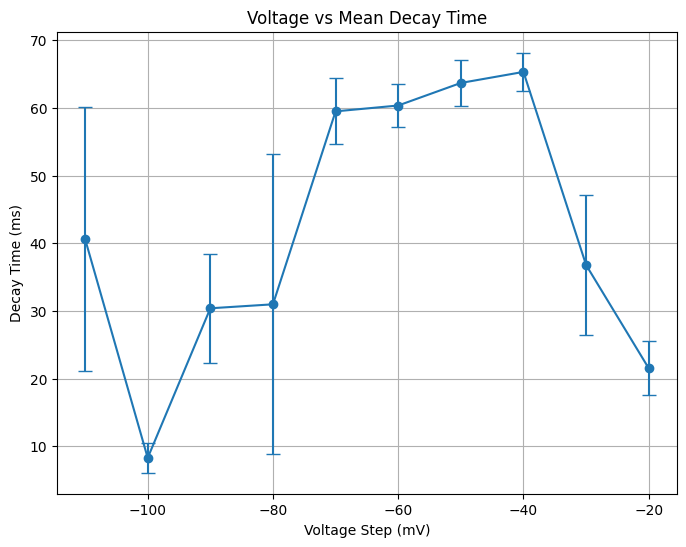

In [ ]:
control = steps_guangxitoxin_control
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (10007, 10501)
tau = 40  # An estimate of the decay time constant

exp_decay_plot(steps_guangxitoxin_control, voltage_steps, time_window, tau)

In [48]:
def exp_decay_plot_multi(control, manipulation, voltage_steps, time_window, tau, experiment_name=None, num_controls=None):
    """
    Fits exponential decay for each sweep, and measures and returns decay timess.

    Args:
      control (NumPy array): control current traces of shape (num_traces, num_samples)
      manipulation (NumPy array): experimental manipulation current traces of shape (num_traces, num_samples)
      voltage_steps (list): List of voltage steps corresponding to each sweep.
      time_window (tuple): Tuple (start_idx, end_idx) indicating the time window for decay fitting.
      tau (integer): an estimate of the exponential decay time constant.
      experiment_name (str or None): Name of the experiment (default is None).
      num_controls (int): Number of control traces (default is None).

    Returns:
      Plot of voltage vs mean decay time with S.E.M. for the group of experiments.
    """
    # Initialize arrays for mean decay times
    decay_times_control = []
    decay_times_manipulation = []

    # Extract time window indices
    start_idx, end_idx = time_window
    time_points = np.arange(end_idx - start_idx)

    # Iterate over each experiment in the control group
    for experiment_idx, sweeps in enumerate(control):
        decay_times = []

        # Iterate over sweeps in the current experiment
        for i, sweep in enumerate(sweeps.T):
            sweep_window = sweep[start_idx:end_idx]
            # Parameter estimates
            a = np.max(sweep_window) - np.min(sweep_window)
            tau_estimate = tau  # An estimate of the decay time constant
            c = np.min(sweep_window)

            # Fit exponential decay function to the current trace within the time window
            try:
                # Exponential curve fitting
                popt, _ = curve_fit(exponential_decay, time_points, sweep_window, p0=[a, tau_estimate, c])
                _, tau_fit, _ = popt  # Extract decay time constant (tau)
                if tau_fit > tau_estimate * 3:
                  tau_fit = 0
                elif tau_fit < 0:
                  tau_fit = 0
                decay_times.append(tau_fit)

            except RuntimeError:
                print(f"Could not fit exponential decay to sweep {i} in experiment {experiment_name[experiment_idx] if experiment_name else experiment_idx}.")
                decay_times.append(np.nan)  # Append NaN if fit fails

        # Store the decay times for the current experiment
        decay_times_control.append(decay_times)

    # Calculate mean and SEM across all experiments for each voltage step
    decay_times_control = np.array(decay_times_control)  # Convert to NumPy array for easier calculations
    mean_control_decay_times = np.nanmean(decay_times_control, axis=0)
    sem_control_decay_times = np.nanstd(decay_times_control, axis=0) / np.sqrt(np.count_nonzero(~np.isnan(decay_times_control), axis=0))

    # Iterate over each experiment in the manipulation group
    for experiment_idx, sweeps in enumerate(manipulation):
        decay_times = []

        # Iterate over sweeps in the current experiment
        for i, sweep in enumerate(sweeps.T):
            sweep_window = sweep[start_idx:end_idx]
            # Parameter estimates
            a = np.max(sweep_window) - np.min(sweep_window)
            tau_estimate = tau  # An estimate of the decay time constant
            c = np.min(sweep_window)

            # Fit exponential decay function to the current trace within the time window
            try:
                # Exponential curve fitting
                popt, _ = curve_fit(exponential_decay, time_points, sweep_window, p0=[a, tau_estimate, c])
                _, tau_fit, _ = popt  # Extract decay time constant (tau)
                if tau_fit > tau_estimate * 3:
                  tau_fit = 0
                elif tau_fit < 0:
                  tau_fit = 0
                decay_times.append(tau_fit)

            except RuntimeError:
                print(f"Could not fit exponential decay to sweep {i} in experiment {experiment_name[experiment_idx] if experiment_name else experiment_idx}.")
                decay_times.append(np.nan)  # Append NaN if fit fails

        # Store the decay times for the current experiment
        decay_times_manipulation.append(decay_times)

    # Calculate mean and SEM across all experiments for each voltage step
    decay_times_manipulation = np.array(decay_times_manipulation)  # Convert to NumPy array for easier calculations
    mean_manipulation_decay_times = np.nanmean(decay_times_manipulation, axis=0)
    sem_manipulation_decay_times = np.nanstd(decay_times_manipulation, axis=0) / np.sqrt(np.count_nonzero(~np.isnan(decay_times_manipulation), axis=0))

    # Create labels for the legend
    control_label = f'Control, n={num_controls}' if num_controls else 'Control'
    manipulation_label = f'{experiment_name}' if experiment_name else 'Manipulation'

    # Plot voltage vs mean decay time with S.E.M.
    plt.figure(figsize=(8, 6))
    plt.errorbar(voltage_steps, mean_control_decay_times, yerr=sem_control_decay_times, fmt='o', linestyle='-', capsize=5, label=control_label)
    plt.errorbar(voltage_steps, mean_manipulation_decay_times, yerr=sem_manipulation_decay_times, fmt='o', linestyle='-', capsize=5, label=manipulation_label)
    plt.xlabel('Voltage Step (mV)')
    plt.ylabel('Decay Time (ms)')
    plt.title(f'Voltage vs Mean Decay Time')
    plt.grid(True)
    plt.legend()
    plt.show()


<ipython-input-46-013d80d8571b>:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(x) / tau) + c
<ipython-input-44-220b488567a0>:75: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(exponential_decay, time_points, sweep_window, p0=[a, tau_estimate, c])


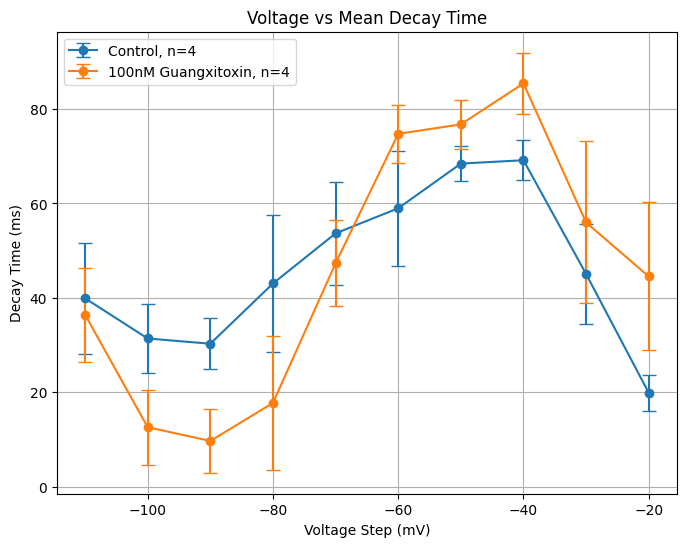

In [ ]:
control = steps_guangxitoxin_control
manipulation = steps_guangxitoxin
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (10010, 10350)
tau = 40
experiment_name = '100nM Guangxitoxin, n=4'
num_controls = 4
exp_decay_plot_multi(control, manipulation, voltage_steps, time_window, tau, experiment_name, num_controls)


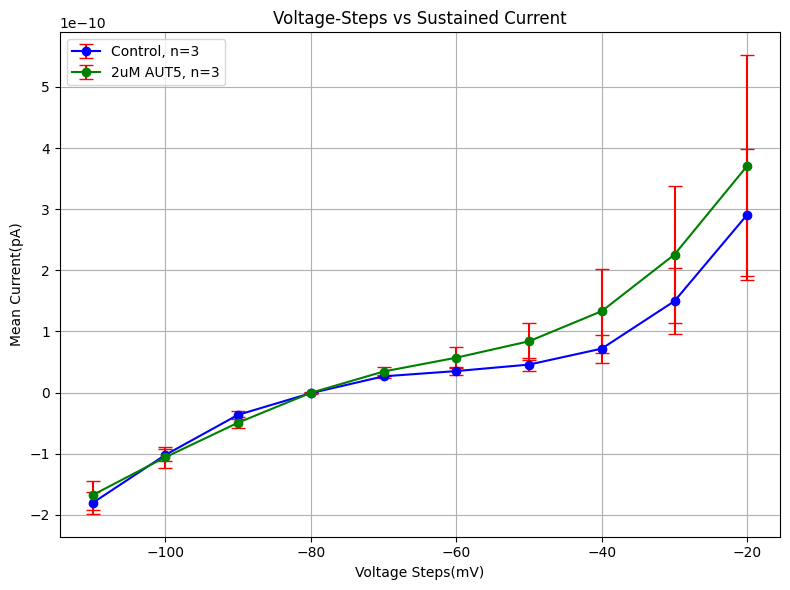

In [ ]:
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (11000, 11100)
control = steps_2aut_control
manipulation = steps_2aut
experiment_name = '2uM AUT5, n=3'
current_type = 'Sustained'
num_controls = 3
voltage_sustained_current_plot(control, manipulation, time_window, voltage_steps, experiment_name, current_type, num_controls)

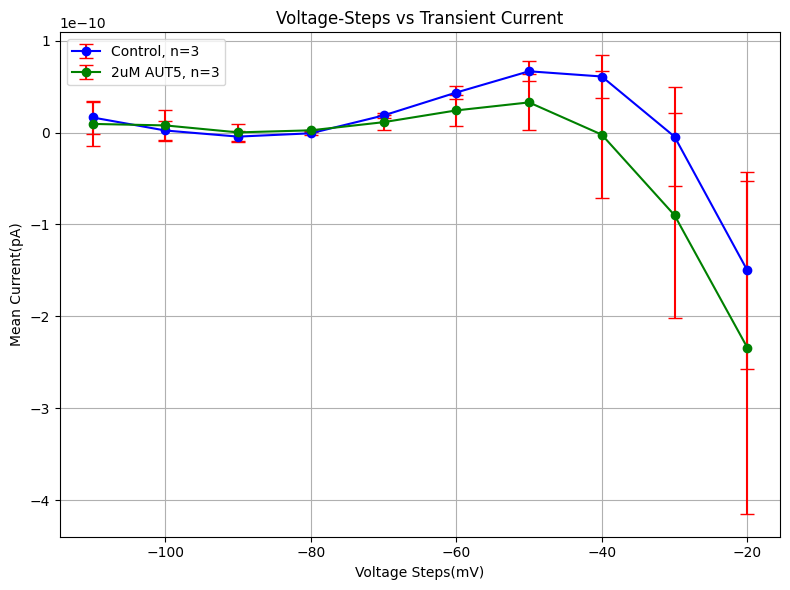

In [ ]:
control = steps_2aut_control
manipulation = steps_2aut
current_time_window = (10007, 10010)
baseline_time_window = (12000, 12100)
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
experiment_name = '2uM AUT5, n=3'
current_type = 'Transient'
num_controls = 3
voltage_transient_current_plot(control, manipulation, current_time_window, baseline_time_window, voltage_steps, experiment_name, current_type, num_controls)

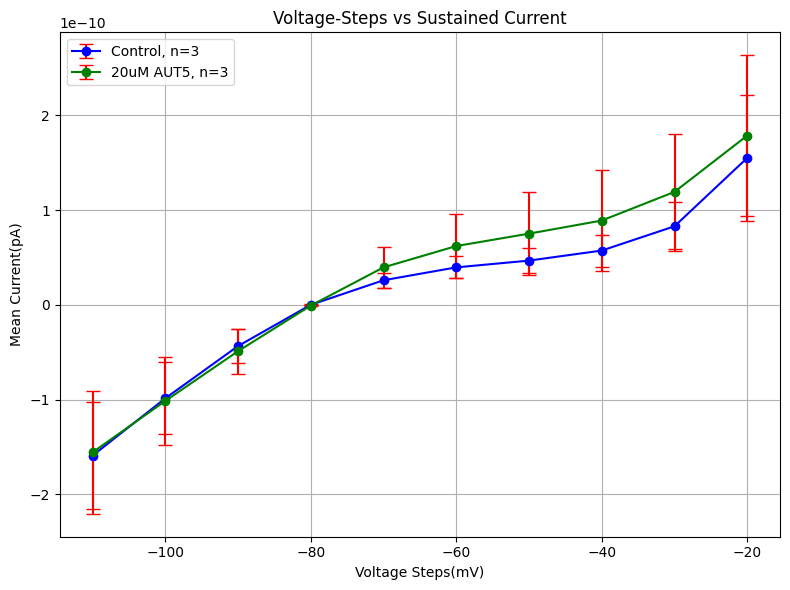

In [ ]:
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (11000, 11100)
control = steps_20aut_control
manipulation = steps_20aut
experiment_name = '20uM AUT5, n=3'
current_type = 'Sustained'
num_controls = 3
voltage_sustained_current_plot(control, manipulation, time_window, voltage_steps, experiment_name, current_type, num_controls)

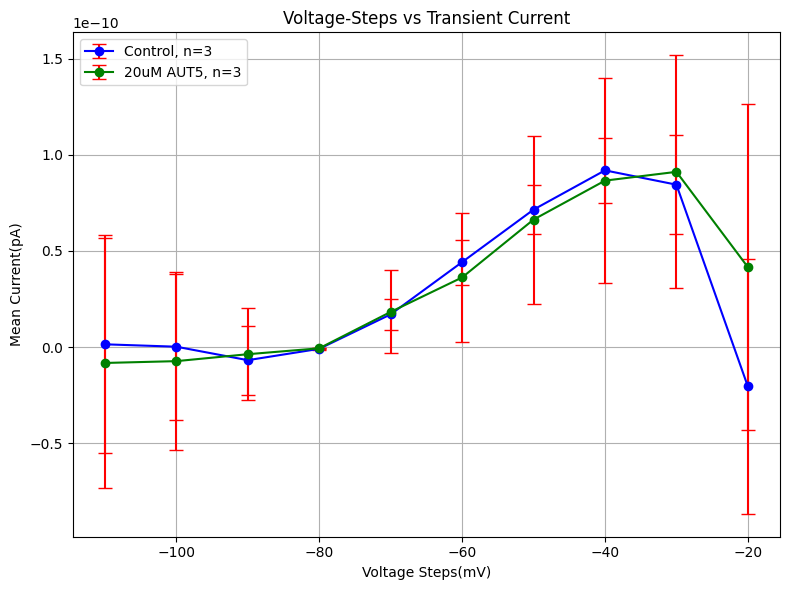

In [ ]:
control = steps_20aut_control
manipulation = steps_20aut
current_time_window = (10007, 10010)
baseline_time_window = (12000, 12100)
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
experiment_name = '20uM AUT5, n=3'
current_type = 'Transient'
num_controls = 3
voltage_transient_current_plot(control, manipulation, current_time_window, baseline_time_window, voltage_steps, experiment_name, current_type, num_controls)

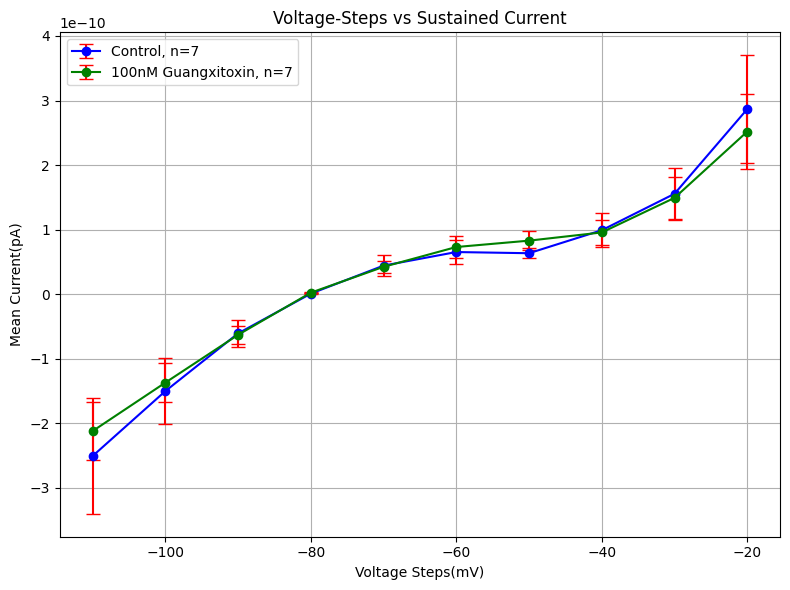

In [ ]:
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (11000, 11100)
control = steps_guangxitoxin_control
manipulation = steps_guangxitoxin
experiment_name = '100nM Guangxitoxin, n=7'
current_type = 'Sustained'
num_controls = 7
voltage_sustained_current_plot(control, manipulation, time_window, voltage_steps, experiment_name, current_type, num_controls)

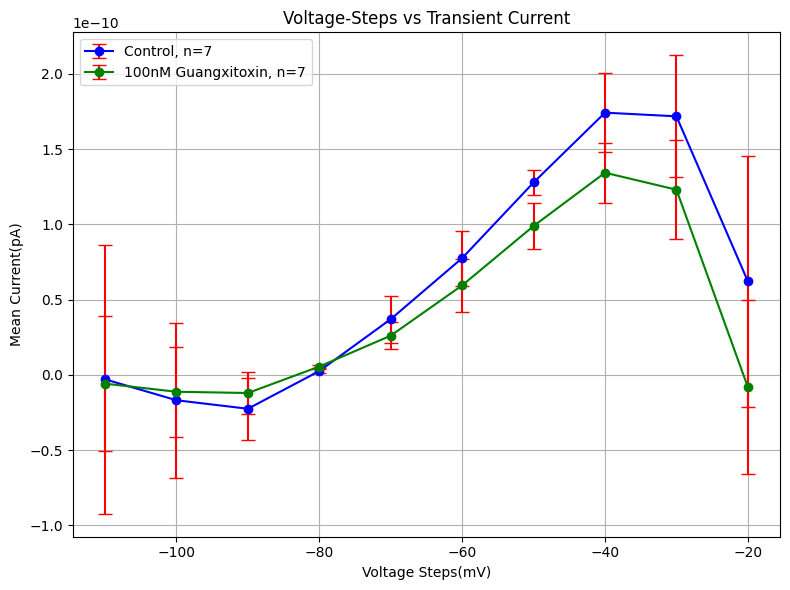

In [ ]:
control = steps_guangxitoxin_control
manipulation = steps_guangxitoxin
current_time_window = (10007, 10010)
baseline_time_window = (12000, 12100)
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
experiment_name = '100nM Guangxitoxin, n=7'
current_type = 'Transient'
num_controls = 7
voltage_transient_current_plot(control, manipulation, current_time_window, baseline_time_window, voltage_steps, experiment_name, current_type, num_controls)

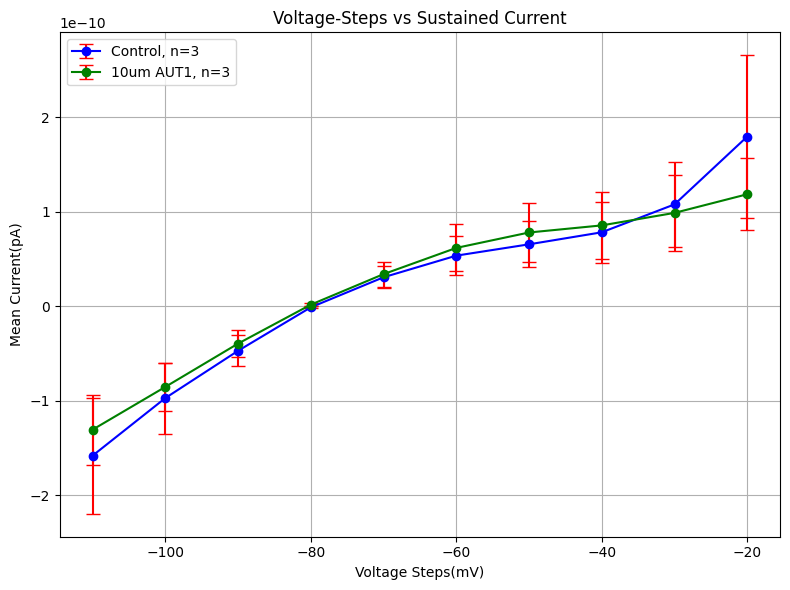

In [ ]:
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (11000, 11100)
control = steps_10aut1_control
manipulation = steps_10aut1
experiment_name = '10um AUT1, n=3'
current_type = 'Sustained'
num_controls = 3
voltage_sustained_current_plot(control, manipulation, time_window, voltage_steps, experiment_name, current_type, num_controls)

In [49]:
control = steps_10aut1_control
manipulation = steps_10aut1
current_time_window = (10007, 10010)
baseline_time_window = (12000, 12100)
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
experiment_name = '10uM AUT1, n=3'
current_type = 'Transient'
num_controls = 3
voltage_transient_current_plot(control, manipulation, current_time_window, baseline_time_window, voltage_steps, experiment_name, current_type, num_controls)

NameError: name 'time_window' is not defined

<ipython-input-47-013d80d8571b>:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-(x) / tau) + c


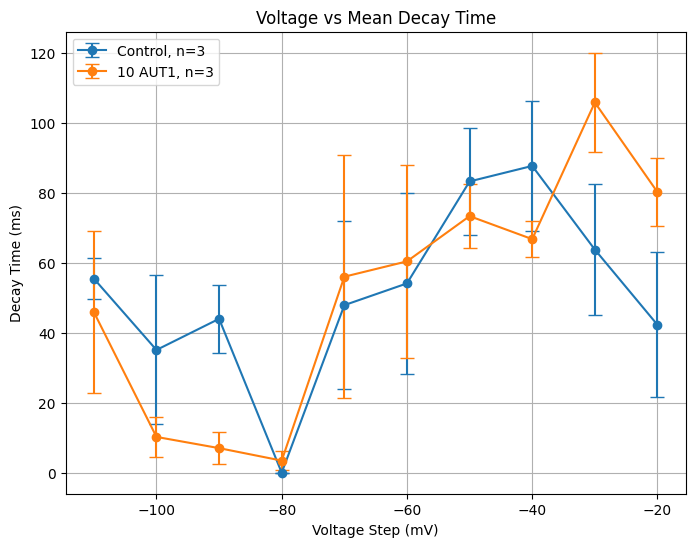

In [51]:
control = steps_10aut1_control
manipulation = steps_10aut1
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (10010, 10350)
tau = 60
experiment_name = '10 AUT1, n=3'
num_controls = 3
exp_decay_plot_multi(control, manipulation, voltage_steps, time_window, tau, experiment_name, num_controls)

Normalized data shape: (40001, 10)
iPhys_2024_11_13_trace_0


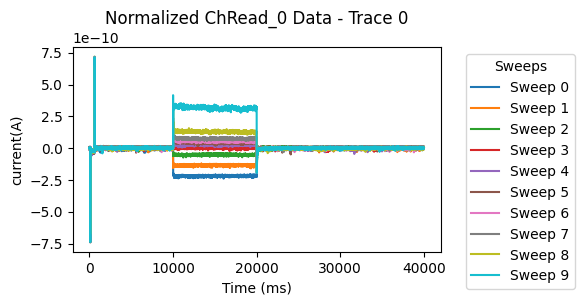

In [ ]:
# iPhys_2024_11_13 Cell1 grna
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_13.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2024_11_13_trace_5


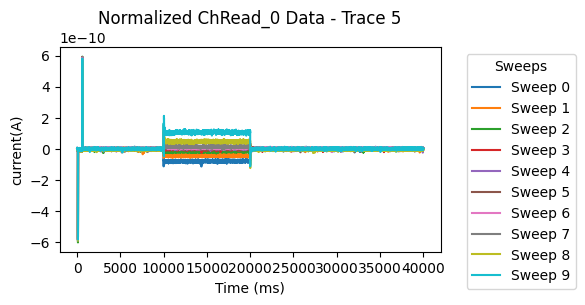

In [ ]:
# iPhys_2024_11_13 Cell2 grna
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_13.h5"
trace_num = 5

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2024_11_19_trace_0


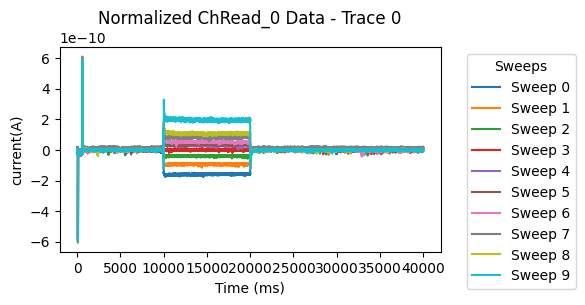

In [ ]:
# iPhys_2024_11_19 Cell1 grna
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_19.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_2024_11_19_trace_8


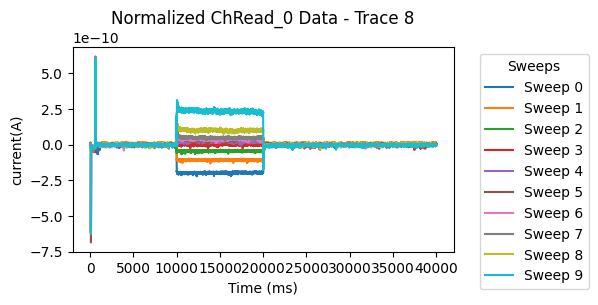

In [ ]:
# iPhys_2024_11_19 Cell2 grna
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_2024_11_19.h5"
trace_num = 8

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_current_20230913_trace_0


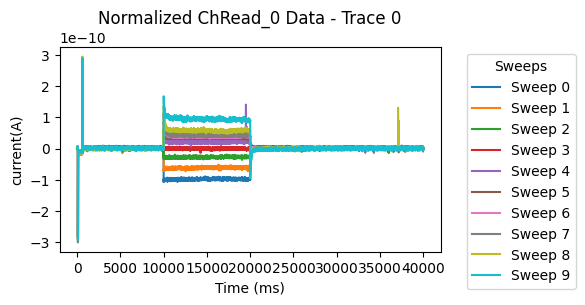

In [ ]:
# iPhys_current_20230913.h5 Cell1 grna
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_current_20230913.h5"
trace_num = 0

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

Normalized data shape: (40001, 10)
iPhys_current_20230913_trace_13


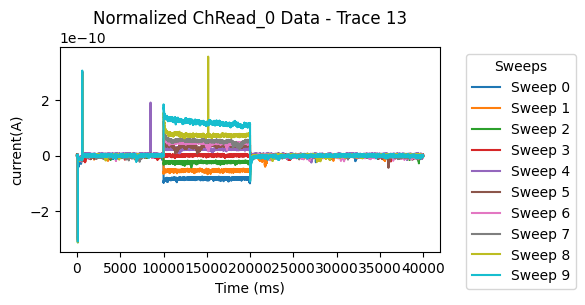

In [ ]:
# iPhys_current_20230913.h5 Cell2 grna
file_path = "/content/drive/MyDrive/Data/ePhys/iPhys_current_20230913.h5"
trace_num = 13

result = normalize_steps2(file_path, trace_num, baseline_range=(5000, 5100))

In [ ]:
# Combine Arrrays
steps_grna = np.array([iPhys_2024_11_13_trace_0, iPhys_2024_11_13_trace_5, iPhys_2024_11_19_trace_0, iPhys_2024_11_19_trace_8])

# Check the shape of array
print(f"array shape: {steps_grna.shape}")

array shape: (4, 40001, 10)


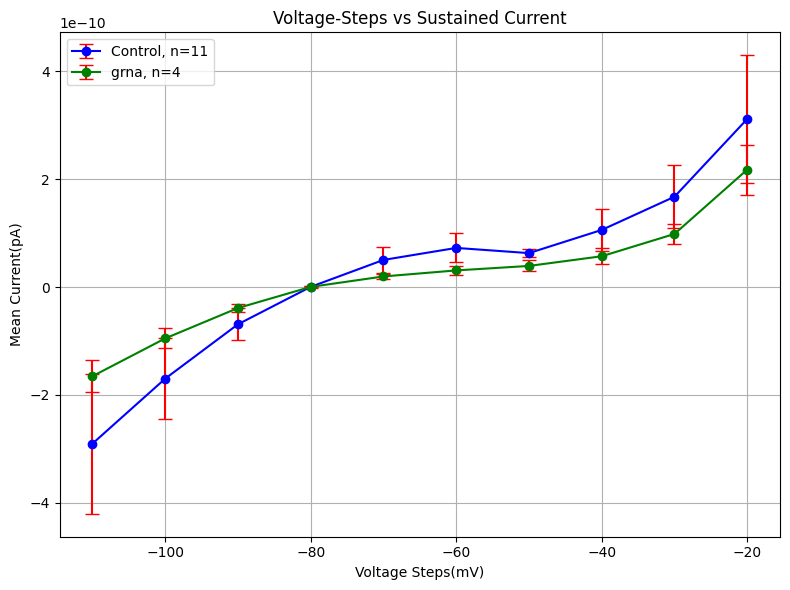

In [ ]:
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (11000, 11100)
control = steps_guangxitoxin_control
manipulation = steps_grna
experiment_name = 'grna, n=4'
current_type = 'Sustained'
num_controls = 11
voltage_sustained_current_plot(control, manipulation, time_window, voltage_steps, experiment_name, current_type, num_controls)

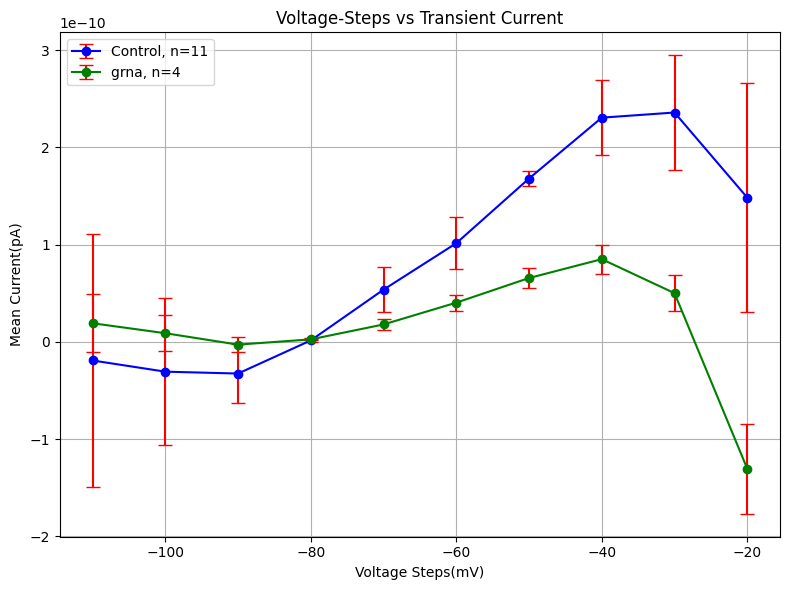

In [ ]:
control = steps_guangxitoxin_control
manipulation = steps_grna
current_time_window = (10007, 10010)
baseline_time_window = (12000, 12100)
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
experiment_name = 'grna, n=4'
current_type = 'Transient'
num_controls = 11
voltage_transient_current_plot(control, manipulation, current_time_window, baseline_time_window, voltage_steps, experiment_name, current_type, num_controls)

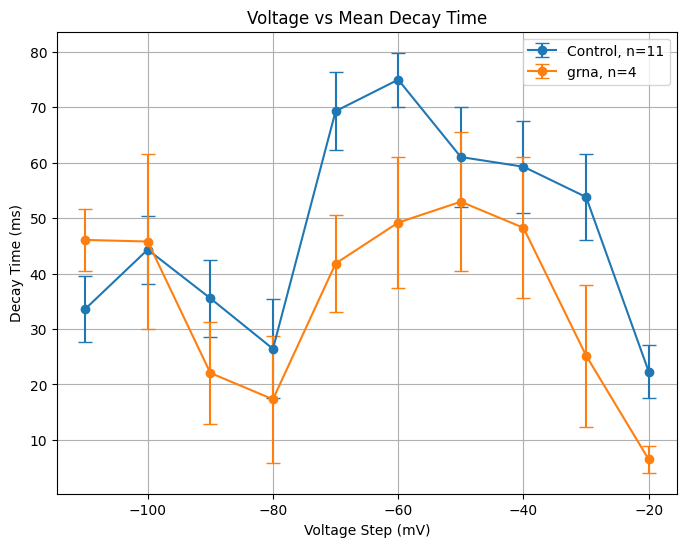

In [ ]:
control = steps_pooled_control
manipulation = steps_grna
voltage_steps = [-110, -100, -90, -80, -70, -60, -50, -40, -30, -20]
time_window = (10010, 10350)
tau = 40
experiment_name = 'grna, n=4'
num_controls = len(steps_pooled_control)
exp_decay_plot_multi(control, manipulation, voltage_steps, time_window, tau, experiment_name, num_controls)

**CsCH3 with 20uM TEA**

In [ ]:
# Import txt data, set delimiter to '\t'
Cell1StepsTrace1_080322 = pd.read_csv("/content/drive/MyDrive/Data/ePhys/080322Cell1StepsTrace1.txt", delimiter='\t')
Cell1StepsTrace1_080322.head()

Tr1_1CH0_SUB  DataA_X  Tr1_1CH0_AP  MeanDataA_X  Tr1_1CH0_FULL  \
0           NaN   3.4681          NaN       3.1994   7.427980e-11   
1           NaN   3.2389          NaN          NaN   7.427980e-11   
2           NaN   3.4211          NaN          NaN   7.263180e-11   
3           NaN   3.1115          NaN          NaN   7.067870e-11   
4           NaN   3.2197          NaN          NaN   7.128910e-11   

   Tr1_2CH0_SUB  Tr1_2CH0_AP  Tr1_2CH0_FULL  Tr1_3CH0_SUB  Tr1_3CH0_AP  ...  \
0           NaN          NaN   9.997560e-11           NaN          NaN  ...   
1           NaN          NaN   9.997560e-11           NaN          NaN  ...   
2           NaN          NaN   1.003420e-10           NaN          NaN  ...   
3           NaN          NaN   9.948730e-11           NaN          NaN  ...   
4           NaN          NaN   9.979250e-11           NaN          NaN  ...   

   Tr1_8CH0_FULL  Tr1_9CH0_SUB  Tr1_9CH0_AP  Tr1_9CH0_FULL  Tr1_10CH0_SUB  \
0   9.362790e-11           NaN          NaN   9.545900e-11            NaN   
1   9.362790e-11           NaN          NaN   9.545900e-11            NaN   
2   9.826660e-11           NaN          NaN   9.893800e-11            NaN   
3   1.013180e-10           NaN          NaN   9.948730e-11            NaN   
4   1.036380e-10           NaN          NaN   9.509280e-11            NaN   

   Tr1_10CH0_AP  Tr1_10CH0_FULL         DataA  MeanWaveAll     MeanDataA  
0           NaN    1.151120e-10  1.037970e-07          NaN  1.875830e-08  
1           NaN    1.151120e-10  4.709730e-08          NaN           NaN  
2           NaN    1.152340e-10  2.948230e-08          NaN           NaN  
3           NaN    1.146850e-10 -2.227040e-08          NaN           NaN  
4           NaN    1.137080e-10 -5.345340e-08          NaN           NaN  

[5 rows x 35 columns]

In [ ]:
# Clean data drop columns
columns_to_drop = [0,1,2,3] + [5, 6] + [8, 9] + [11, 12] + [14, 15] + [17, 18] + [20, 21] + [23, 24] + [26,27] + [29,30] + [32,33,34]
Cell1StepsTrace1_080322 = Cell1StepsTrace1_080322.drop(Cell1StepsTrace1_080322.columns[columns_to_drop], axis=1)
print(Cell1StepsTrace1_080322.head())

   Tr1_1CH0_FULL  Tr1_2CH0_FULL  Tr1_3CH0_FULL  Tr1_4CH0_FULL  Tr1_5CH0_FULL  \
0   7.427980e-11   9.997560e-11   7.891850e-11   8.416750e-11   9.545900e-11   
1   7.427980e-11   9.997560e-11   7.891850e-11   8.416750e-11   9.545900e-11   
2   7.263180e-11   1.003420e-10   8.557130e-11   8.422850e-11   9.271240e-11   
3   7.067870e-11   9.948730e-11   8.972170e-11   8.404540e-11   9.094240e-11   
4   7.128910e-11   9.979250e-11   9.204100e-11   8.502200e-11   9.198000e-11   

   Tr1_6CH0_FULL  Tr1_7CH0_FULL  Tr1_8CH0_FULL  Tr1_9CH0_FULL  Tr1_10CH0_FULL  
0   9.234620e-11   1.003420e-10   9.362790e-11   9.545900e-11    1.151120e-10  
1   9.234620e-11   1.003420e-10   9.362790e-11   9.545900e-11    1.151120e-10  
2   9.320070e-11   9.704590e-11   9.826660e-11   9.893800e-11    1.152340e-10  
3   9.375000e-11   9.582520e-11   1.013180e-10   9.948730e-11    1.146850e-10  
4   9.692380e-11   9.478760e-11   1.036380e-10   9.509280e-11    1.137080e-10  


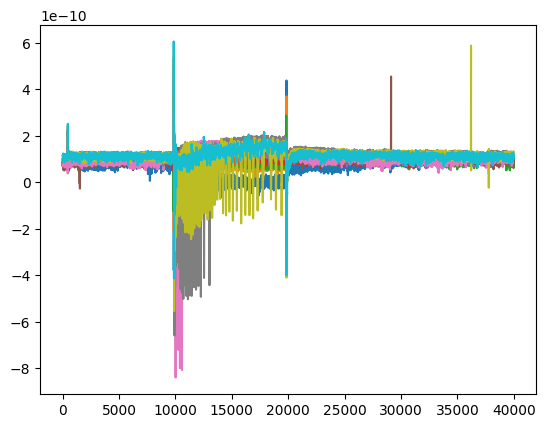

In [ ]:
plt.plot(Cell1StepsTrace1_080322)

In [ ]:
Cell2StepsTrace6_080322 = pd.read_csv("/content/drive/MyDrive/Data/ePhys/080322Cell2StepsTrace6.txt", delimiter='\t')
Cell1StepsTrace5_081022 = pd.read_csv("/content/drive/MyDrive/Data/ePhys/081022Cell1StepsTrace5.txt", delimiter='\t')
Cell2StepsTrace12_081022 = pd.read_csv("/content/drive/MyDrive/Data/ePhys/081022Cell2StepsTrace12.txt", delimiter='\t')
Cell2StepsTrace1_081622 = pd.read_csv("/content/drive/MyDrive/Data/ePhys/081622Cell1StepsTrace1.txt", delimiter='\t')
Cell2StepsTrace13_081622 = pd.read_csv("/content/drive/MyDrive/Data/ePhys/081622Cell2StepsTrace13.txt", delimiter='\t')

In [ ]:
def normalize_steps_txt_file(file_path, file_name, columns_to_drop, baseline_range=(5000, 5100)):
    """
    Cleans and normalizes electrophysiology voltage step data from a .txt file.

    Args:
        file_path (str): Path to the .txt file.
        columns_to_drop (list): List of column indices to drop from the file.
        baseline_range (tuple): Range of samples to calculate baseline (start, end).

    Returns:
        np.ndarray: cleaned and normalized NumPy array.
    """
    try:
        # Read the file into a df
        df = pd.read_csv(file_path, delimiter='\t')

        # Drop specified columns
        df = df.drop(df.columns[columns_to_drop], axis=1)

        # Convert to NumPy array
        data_array = df.to_numpy()

        # Normalize the array by subtracting the mean baseline
        baseline_values = data_array[baseline_range[0]:baseline_range[1], :].mean(axis=0, keepdims=True)
        normalized_array = data_array - baseline_values
        print(f"Normalized data shape: {normalized_array.shape}")

        variable_name = f"{file_name}"
        print(variable_name)
        globals()[variable_name] = normalized_array

        # plot
        plt.figure(figsize=(6, 3))
        for i in range(normalized_array.shape[1]):
            plt.plot(normalized_array[:, i], label=f'Sweep {i}')

        plt.title(f'Normalized Steps')
        plt.xlabel('Time (ms)')
        plt.ylabel('current(A)')
        plt.legend(title='Sweeps', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        plt.close()

        return globals()[variable_name]

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


Normalized data shape: (40000, 10)
Cell2StepsTrace6_080322


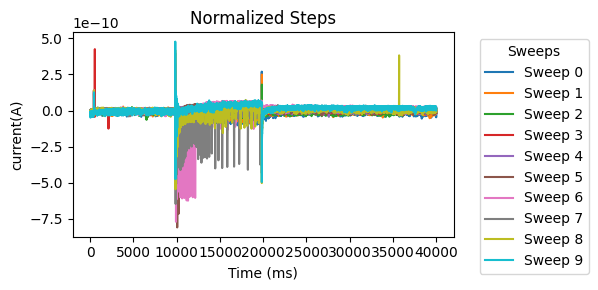

In [ ]:
file_path = "/content/drive/MyDrive/Data/ePhys/080322Cell2StepsTrace6.txt"
file_name = 'Cell2StepsTrace6_080322'
columns_to_drop = [0,1,2,3] + [5, 6] + [8, 9] + [11, 12] + [14, 15] + [17, 18] + [20, 21] + [23, 24] + [26,27] + [29,30] + [32,33,34]

result = normalize_steps_txt_file(file_path, file_name, columns_to_drop)

Normalized data shape: (40000, 10)
Cell1StepsTrace5_081022


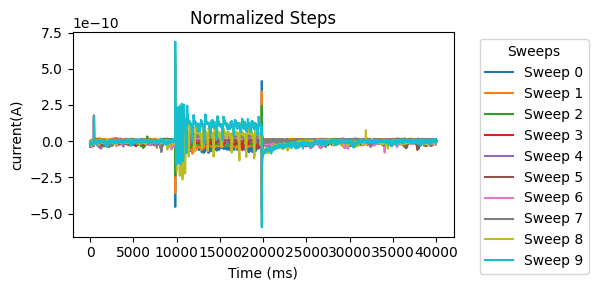

In [ ]:
file_path = "/content/drive/MyDrive/Data/ePhys/081022Cell1StepsTrace5.txt"
file_name = 'Cell1StepsTrace5_081022'

result = normalize_steps_txt_file(file_path, file_name, columns_to_drop)

Normalized data shape: (40000, 10)
Cell2StepsTrace12_081022


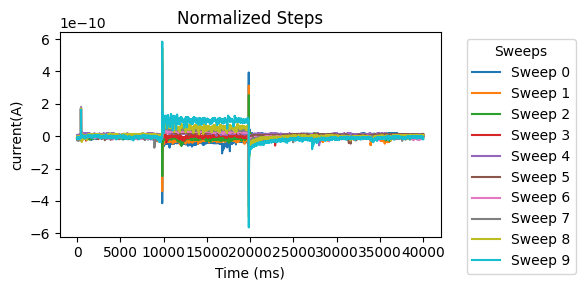

In [ ]:
file_path = "/content/drive/MyDrive/Data/ePhys/081022Cell2StepsTrace12.txt"
file_name = 'Cell2StepsTrace12_081022'

result = normalize_steps_txt_file(file_path, file_name, columns_to_drop)

Normalized data shape: (40000, 10)
Cell2StepsTrace1_081622


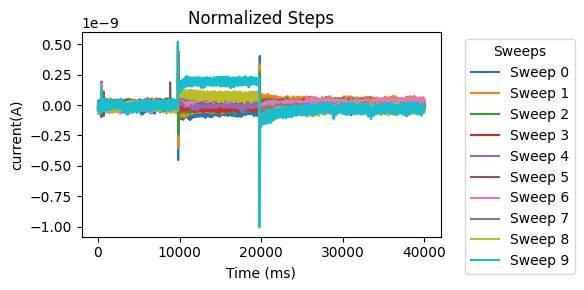

In [ ]:
file_path = "/content/drive/MyDrive/Data/ePhys/081622Cell1StepsTrace1.txt"
file_name = 'Cell2StepsTrace1_081622'

result = normalize_steps_txt_file(file_path, file_name, columns_to_drop)

Normalized data shape: (40000, 10)
Cell2StepsTrace13_081622


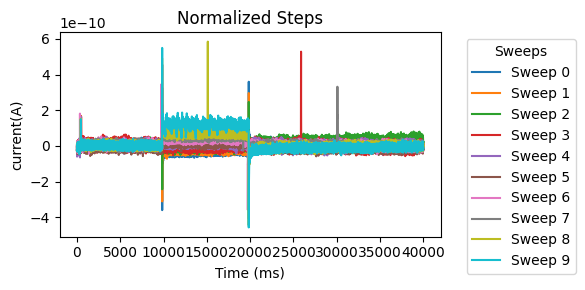

In [ ]:
file_path = "/content/drive/MyDrive/Data/ePhys/081622Cell2StepsTrace13.txt"
file_name = 'Cell2StepsTrace13_081622'

result = normalize_steps_txt_file(file_path, file_name, columns_to_drop)

In [ ]:
# combine Cs TEA Steps arrays
steps_tea = np.array([Cell1StepsTrace1_080322, Cell2StepsTrace6_080322, Cell1StepsTrace5_081022, Cell2StepsTrace12_081022,
                      Cell2StepsTrace1_081622,Cell2StepsTrace13_081622])
# Check the shape of array
print(f"array shape: {steps_tea.shape}")

array shape: (6, 40000, 10)


In [ ]:
averaged_cs_tea_steps = np.mean(steps_tea, axis=0)


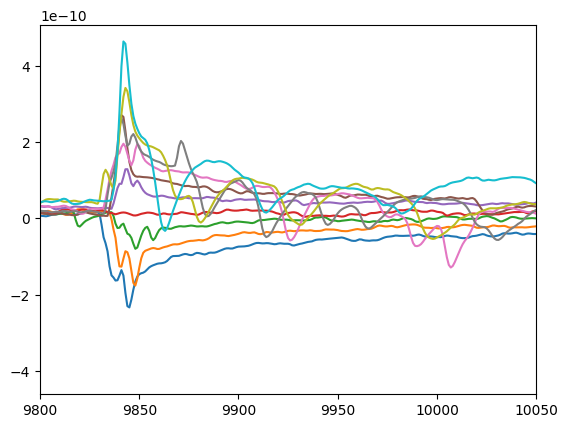

In [ ]:
plt.plot(averaged_cs_tea_steps)
plt.xlim(9800, 10050)
#plt.xticks(ticks, rotation=90)

# Show the plot
plt.show()

In [ ]:
averaged_grna_steps = np.mean(steps_grna, axis=0)

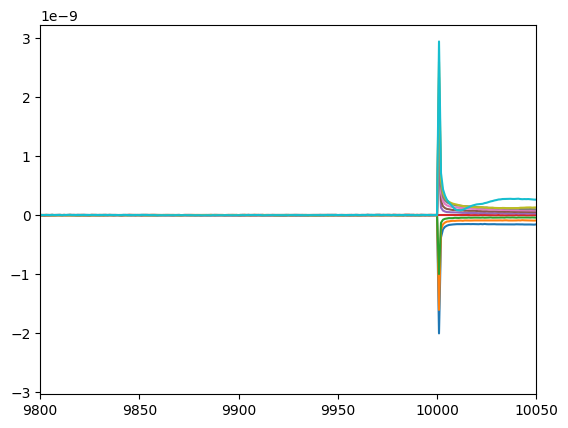

In [ ]:
plt.plot(averaged_grna_steps)
plt.xlim(9800, 10050)
#plt.xticks(ticks, rotation=90)

# Show the plot
plt.show()